<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

Srikanta Patra Thu 4/11/2021 @ 18:18

Project-2 Feedback
--------------------
Hi Krisdan,
You have scored an overall 2 in a scale of 0 to 3 as stated in the project 2 readme.
Below are my comments:
- Under 1.1 they are asking to load the file using csv module, but you have used pandas to load it.
- Under 1.2 you are getting same datatypes since your loading method for 1.1 and 1.2 are same i.e. using pandas...:). If you would have used csv module, you would have found few differences in datatypes between the two techniques.
  You should have removed the row with 'All' states since that is just a total of all rows.
- For 2, though what you have done is not wrong, create more of a write up stating the meaning of columns, number of rows/cols etc would be ideal. Something like the data description file in Project 3.
- Good work on 3. Appreciate you creating functions for various tasks. Thinking in terms of functions makes your code more organized. I also liked how you have put the back references to original lessons/labs.
- In 4, liked how you have created box plots using standardized data.
- Good work on 5 and 6. Just make sure that you write your insights/findings/non-tech comments on markdown and just put code related comments into code cell.
- For 7, it would be good to note down your findings from each visualization into markdowns. Appreciate your attempt to plot only the lower triangle.
- Great attempt on hypothesis testing. I loved your Executive Summary. As you have done, it's a good practice to keep both your attempts to showcase that you have tried multiple experiments.
  Make sure that to set equal_variance = False as that is the case.
- Interesting findings on drug comparison.
- For 8, liked your analysis of outliers using IQR method. Additional learning can be using scatter plot, box plot, anomaly detection techniques etc.
- Very detailed analysis on percentile and Spearman rank.

Overall, great job. Your notebook demonstrate that you have gained lot of confidence in implementing the statistical and EDA concepts using Python. Keep it up.

In [116]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Added myself from dsi-unit-2.09-eda-visualization_intro-lesson


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [117]:
# Load the file with the csv module 
#sat_scores = pd.read_csv('./sat_scores.csv')
sat_scores = pd.read_csv('./sat_scores.csv')
sat_scores = sat_scores[sat_scores['State'] != 'All']
sat_scores_noall = sat_scores[sat_scores['State'] != 'All']
# and put it in a Python dictionary
dict_from_sat_scores = sat_scores.to_dict(orient = 'list')

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

#### 1.2.a Make a pandas DataFrame object with the SAT dictionary, 
#### 1.2.b Make a pandas DataFrame object with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [118]:
# Make a pandas DataFrame object with the SAT dictionary
sat_scores_df_from_dict = pd.DataFrame(dict_from_sat_scores)
# Make a pandas DataFrame object with the pandas .read_csv() function
sat_scores_df_from_read_csv = pd.DataFrame(sat_scores)
display(
    sat_scores_df_from_dict.dtypes,
    sat_scores_df_from_read_csv.dtypes,
    "No observable difference between loading from file and inputting this dictionary"
    )

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

'No observable difference between loading from file and inputting this dictionary'

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [119]:
# Look at the first ten rows of the DataFrame

# What does our data describe?
    # The name of the measured state
    # The Rate of participation of a state
    # The Verbal score of the state
    # The Math score of the state


display(
    sat_scores_df_from_read_csv.head(10),
    sat_scores_df_from_read_csv.columns[1:].to_list(),
    sat_scores_df_from_read_csv.shape,
    sat_scores_df_from_read_csv.info()
    )


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   Rate    51 non-null     int64 
 2   Verbal  51 non-null     int64 
 3   Math    51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


['Rate', 'Verbal', 'Math']

(51, 4)

None

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [120]:
# "This should contain the name of each variable (column), the type of the variable"
sat_data_dictionary = {
    'State' : 'Two-Letter name for the state',
    'Rate' : 'Participation Rate',
    'Verbal':'Score in Verbal skills',
    'Math':'Score in Math skills'
}

display(
    sat_scores.shape,
    sat_data_dictionary
)

# "This should contain ...the shape (rows and columns) of the entire dataset"
print("This dataset has {} rows and {} columns".format(sat_scores.shape[0], sat_scores.shape[1]))

(51, 4)

{'State': 'Two-Letter name for the state',
 'Rate': 'Participation Rate',
 'Verbal': 'Score in Verbal skills',
 'Math': 'Score in Math skills'}

This dataset has 51 rows and 4 columns


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [121]:
'''
Taken from 2.04
dsi-unit-2.04-python-descriptive_statistics_numpy-lab/solution-code/describe-sales-data-solutions.ipynb
'''
# Geoff gives tip about how to pick the sive of a bin:
# int(np.sqrt(len(series)))

def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

In [122]:

'''
Taken from 
dsi-unit-2.02-statistics-random_variables_distributions-lesson/random-variables-probability-distributions.ipynb

'''

def plot_discrete_pmf(low, high, title, stats_dist=None, lw=20):
    
    if stats_dist is None:
        discrete = stats.randint(low, high+1)
    else:
        discrete = stats_dist
    
    x = np.arange(low-1., high+1.)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel('Outcomes', fontsize=16)
    ax.set_ylabel('Probability Mass Function (pmf)', fontsize=16)
    ax.vlines(x, 0, discrete.pmf(x), colors='darkred', lw=lw, alpha=0.6)
    ax.set_ylim(0, np.max(discrete.pmf(x))+0.03)
    
#    plt.title(title, fontsize=20)

    plt.show()

In [123]:
'''
Taken from 
dsi-unit-2.02-statistics-random_variables_distributions-lesson/random-variables-probability-distributions.ipynb

'''

def plot_discrete_cdf(low, high, title='Discrete', stats_dist=None):
    """
    a function that will plot a cumulative distribution function
    """
    if stats_dist is None:
        discrete = stats.randint(low, high+1)
    else:
        discrete = stats_dist
        
    x = np.linspace(low-1, high+1, 300)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))

    ax.set_ylim(0, 1.1)
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel('Outcomes', fontsize=16)
    ax.set_ylabel('Cumulative Distribution Function (cdf)', fontsize=16)
    
    ax.plot(x, discrete.cdf(x), lw=4, color='darkblue')
    
    plt.title(title, fontsize=20)

    plt.show()


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

None

None

None

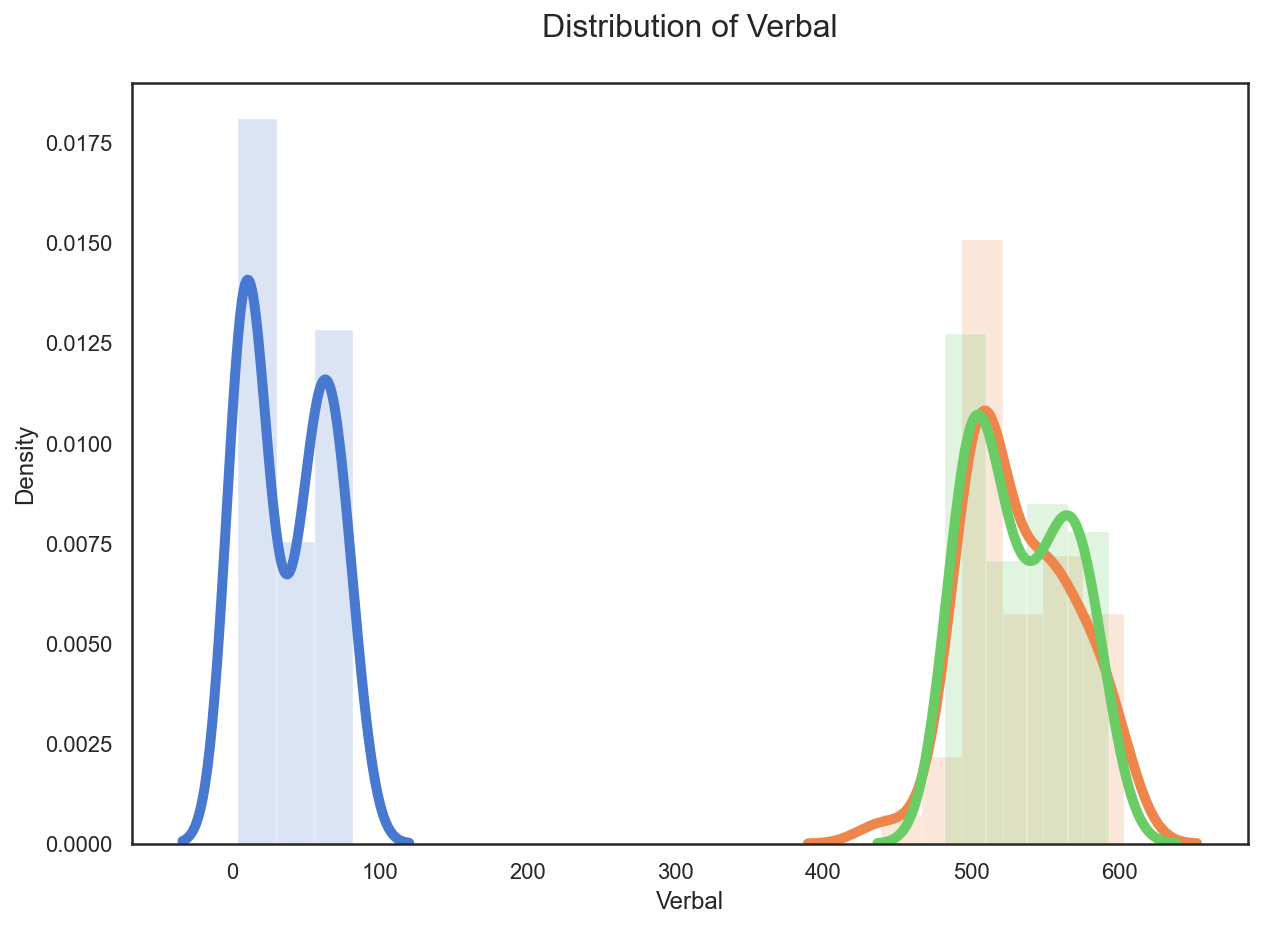

In [124]:
# find the def from that other lesson
# maybe find out how to put the legend
display(
    distribution_plotter('Rate',sat_scores),
    distribution_plotter('Math',sat_scores),
    distribution_plotter('Verbal',sat_scores)
    )

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

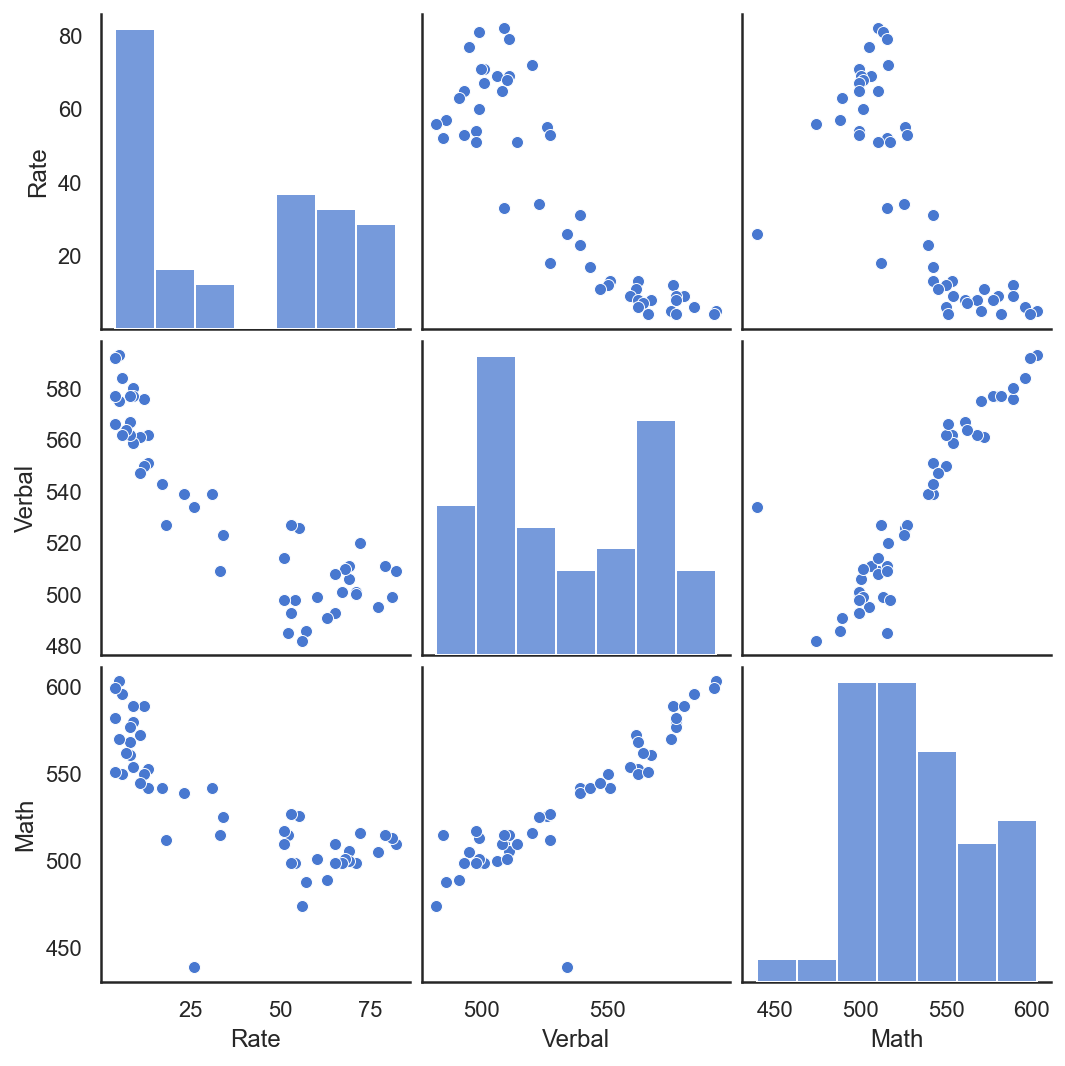

In [125]:
sns.pairplot(sat_scores)

In [126]:
# Site for scatter Plot Tips: https://www.python-graph-gallery.com/scatter-plot/

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [127]:
# Testing & Nesting the square-root of length to decide the width of the bins

display(
    print("len(sat_scores['Verbal']) = ", len(sat_scores['Verbal'])),
    print("np.sqrt(len(sat_scores['Verbal'])) = ",np.sqrt(len(sat_scores['Verbal']))),
    print("int(np.sqrt(len(sat_scores['Verbal']))) = ",int(np.sqrt(len(sat_scores['Verbal']))))
)

len(sat_scores['Verbal']) =  51
np.sqrt(len(sat_scores['Verbal'])) =  7.14142842854285
int(np.sqrt(len(sat_scores['Verbal']))) =  7


None

None

None

<AxesSubplot:ylabel='Frequency'>

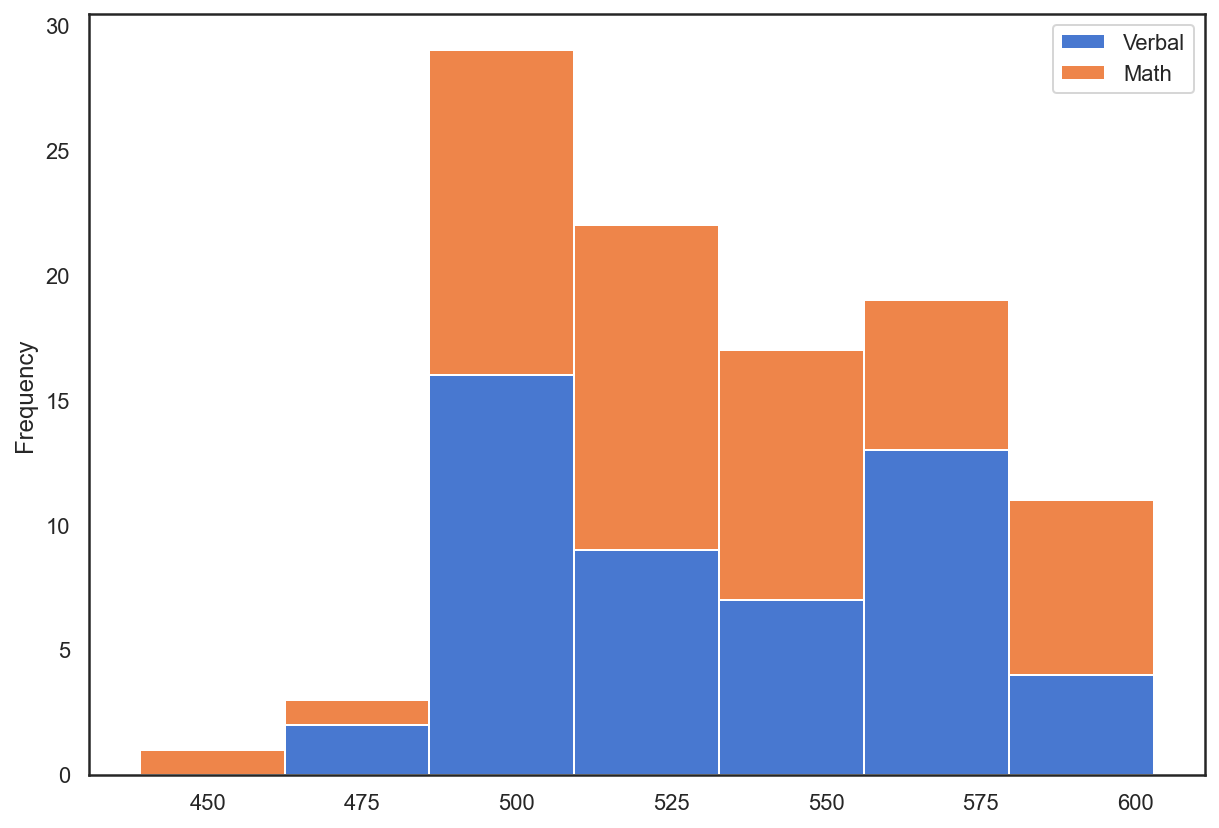

In [128]:
sat_scores[['Verbal', 'Math']].plot.hist(stacked=True, bins= int(np.sqrt(len(sat_scores['Verbal']))))

<AxesSubplot:ylabel='Frequency'>

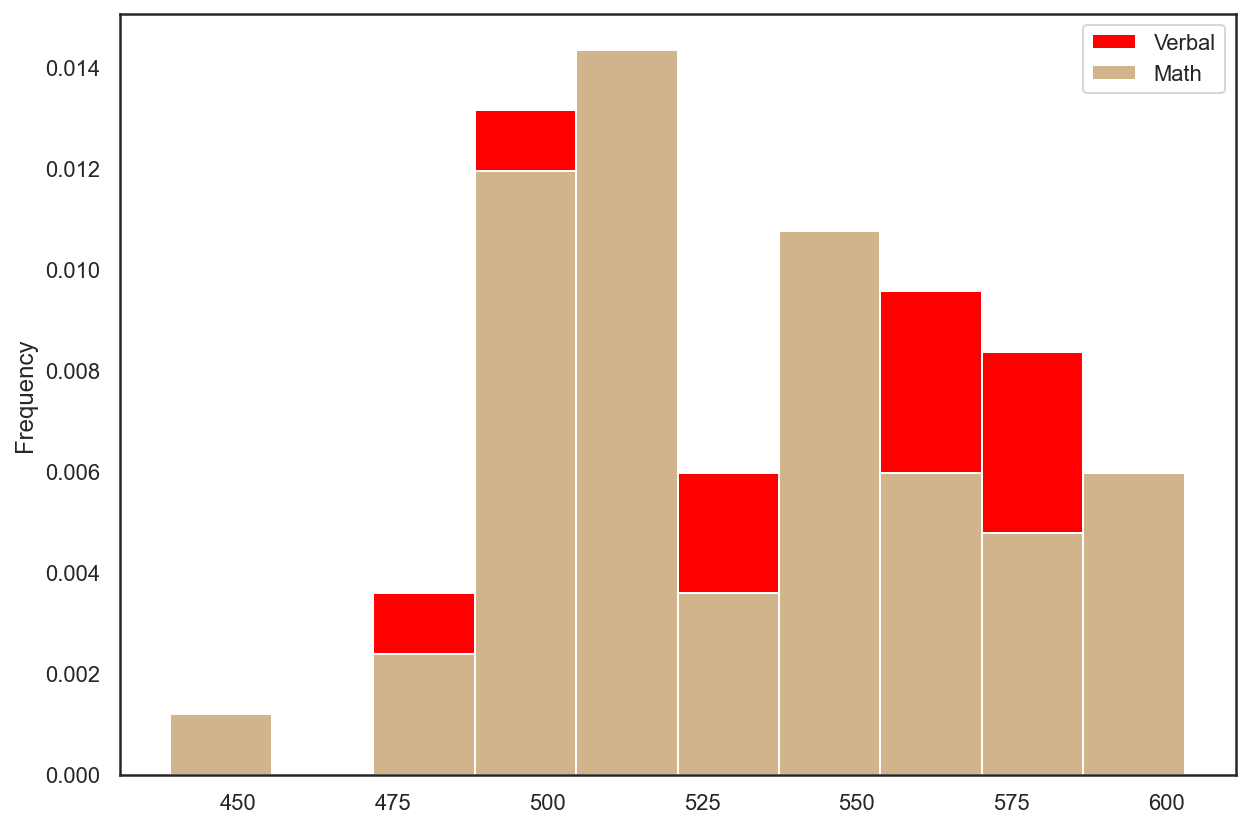

In [129]:
sat_scores[['Verbal', 'Math']].plot.hist(sat_scores[['Verbal', 'Math']], 10, density=True, histtype='bar', color=['red', 'tan'], label=['Verbal', 'Math'])

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [130]:
# What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
    # Boxplots allow you to quickly determine the min, max, range, Q1, Q2, and Q3 and any outliers much faster than a scatterplot or a histogram

# What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?
    # 'Rate' is a percentage whilst Math and Verbal are actaul scores. before comparing in the same chart they might be standardised

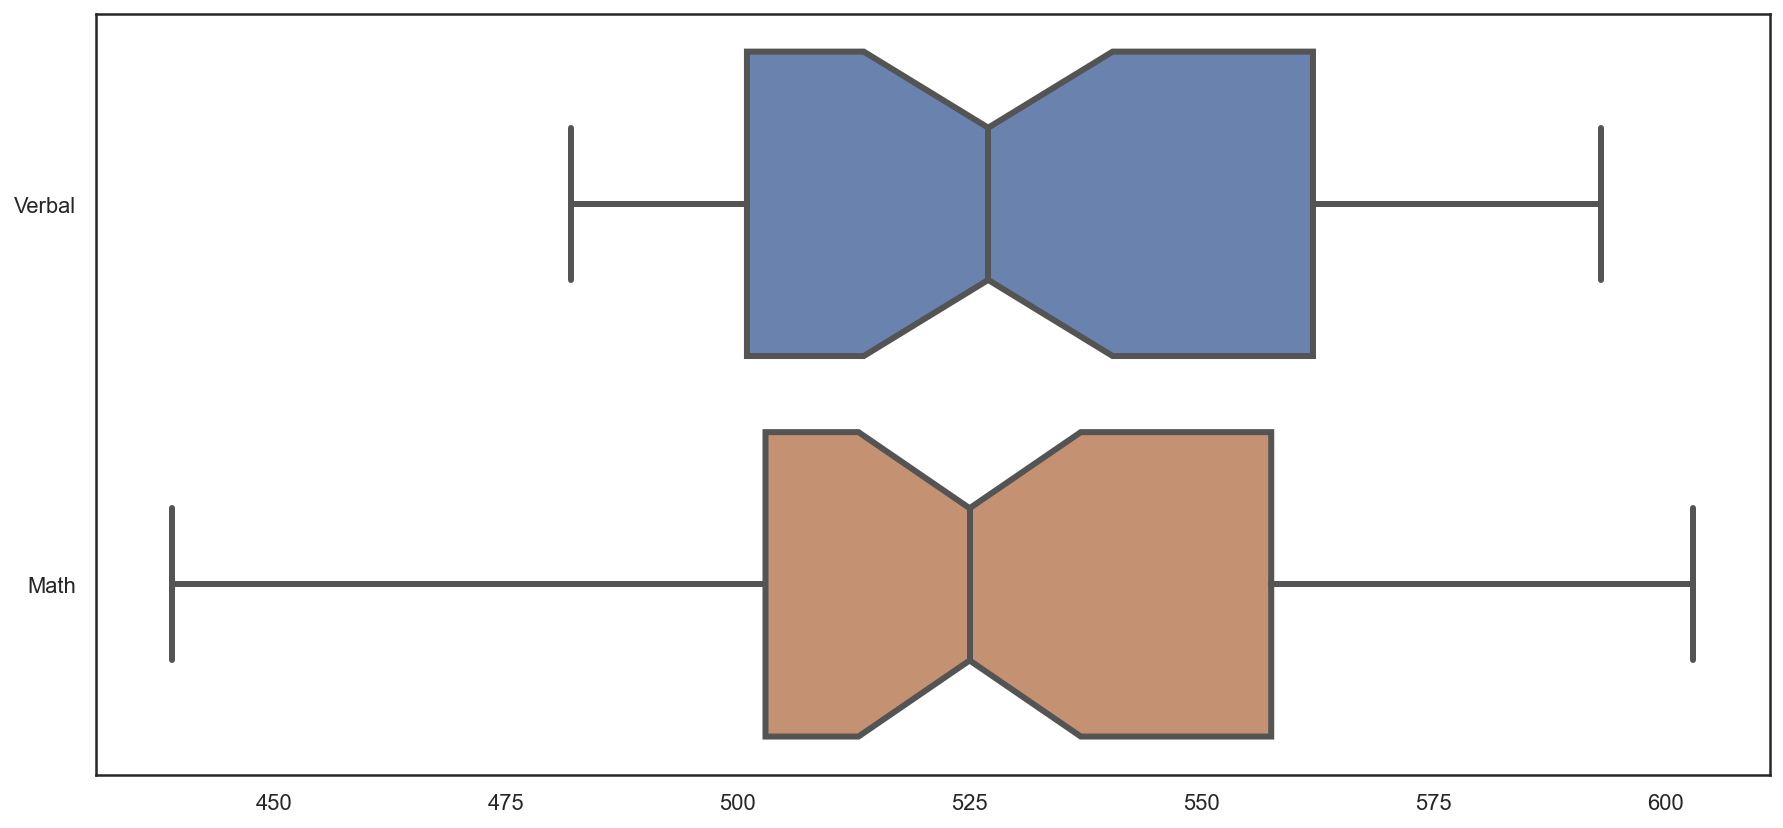

In [131]:
# 4.2 Plot Verbal and Math on the same chart using boxplots
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

ax = sns.boxplot(data=sat_scores[['Verbal', 'Math']], orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


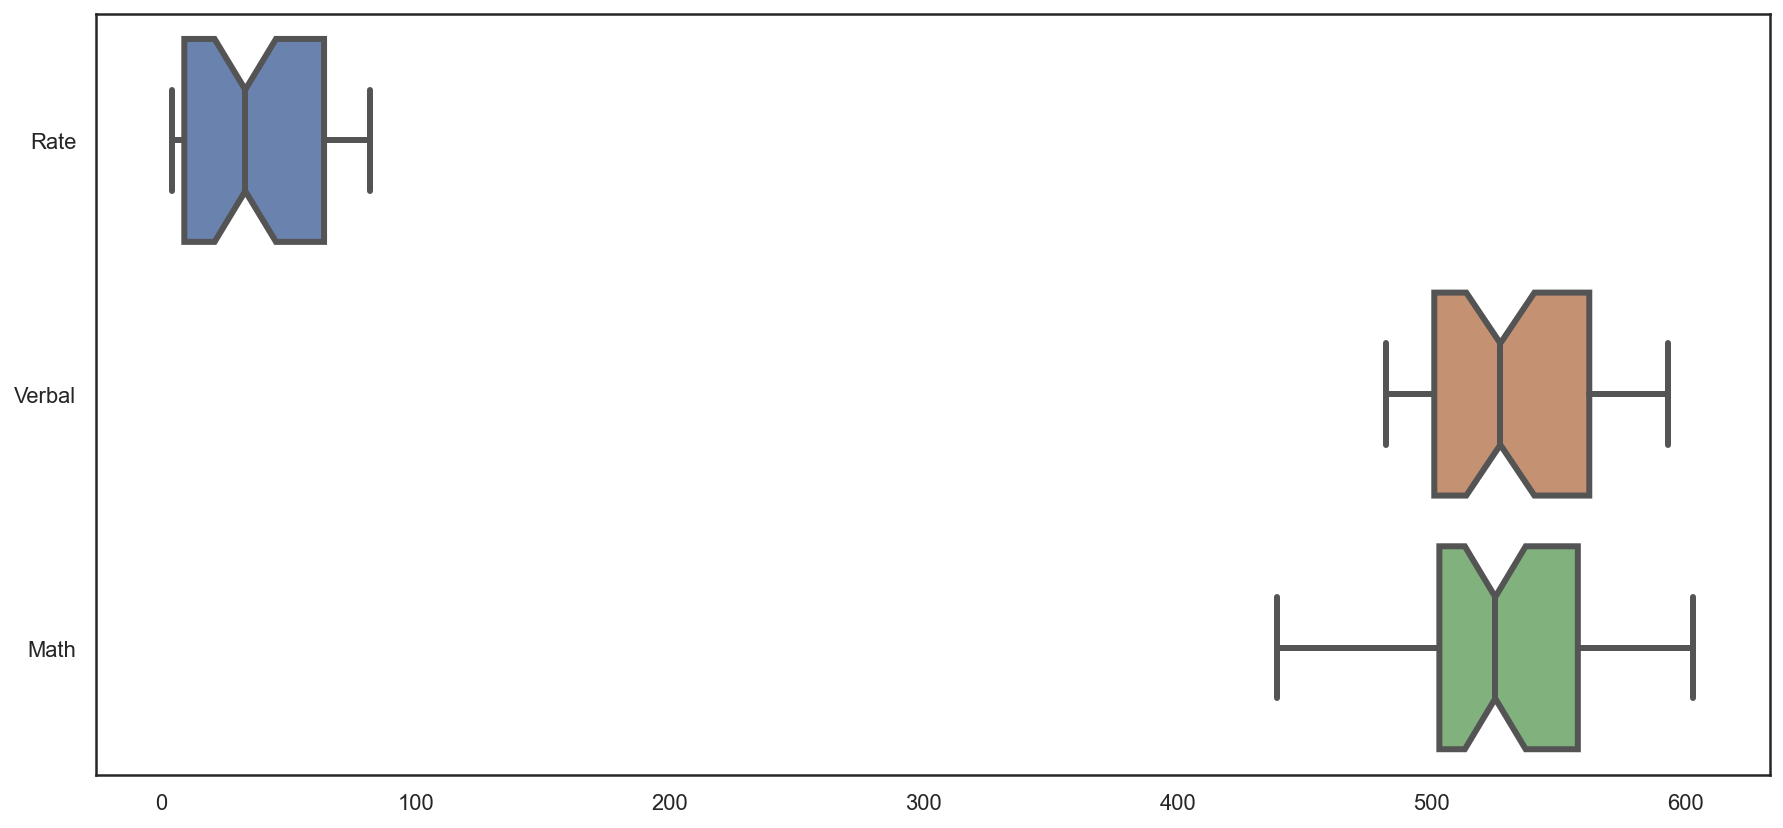

In [132]:
# This is Verbal, Math, and Rate inappropriately on the same boxplot chart

fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

ax = sns.boxplot(data=sat_scores, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

# sns.boxplot(data = sat_scores)

<ipython-input-133-1935abbe2fc4>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sat_scores_standardised = (sat_scores - sat_scores.mean()) / sat_scores.std() # Line of code to standardise the dataset


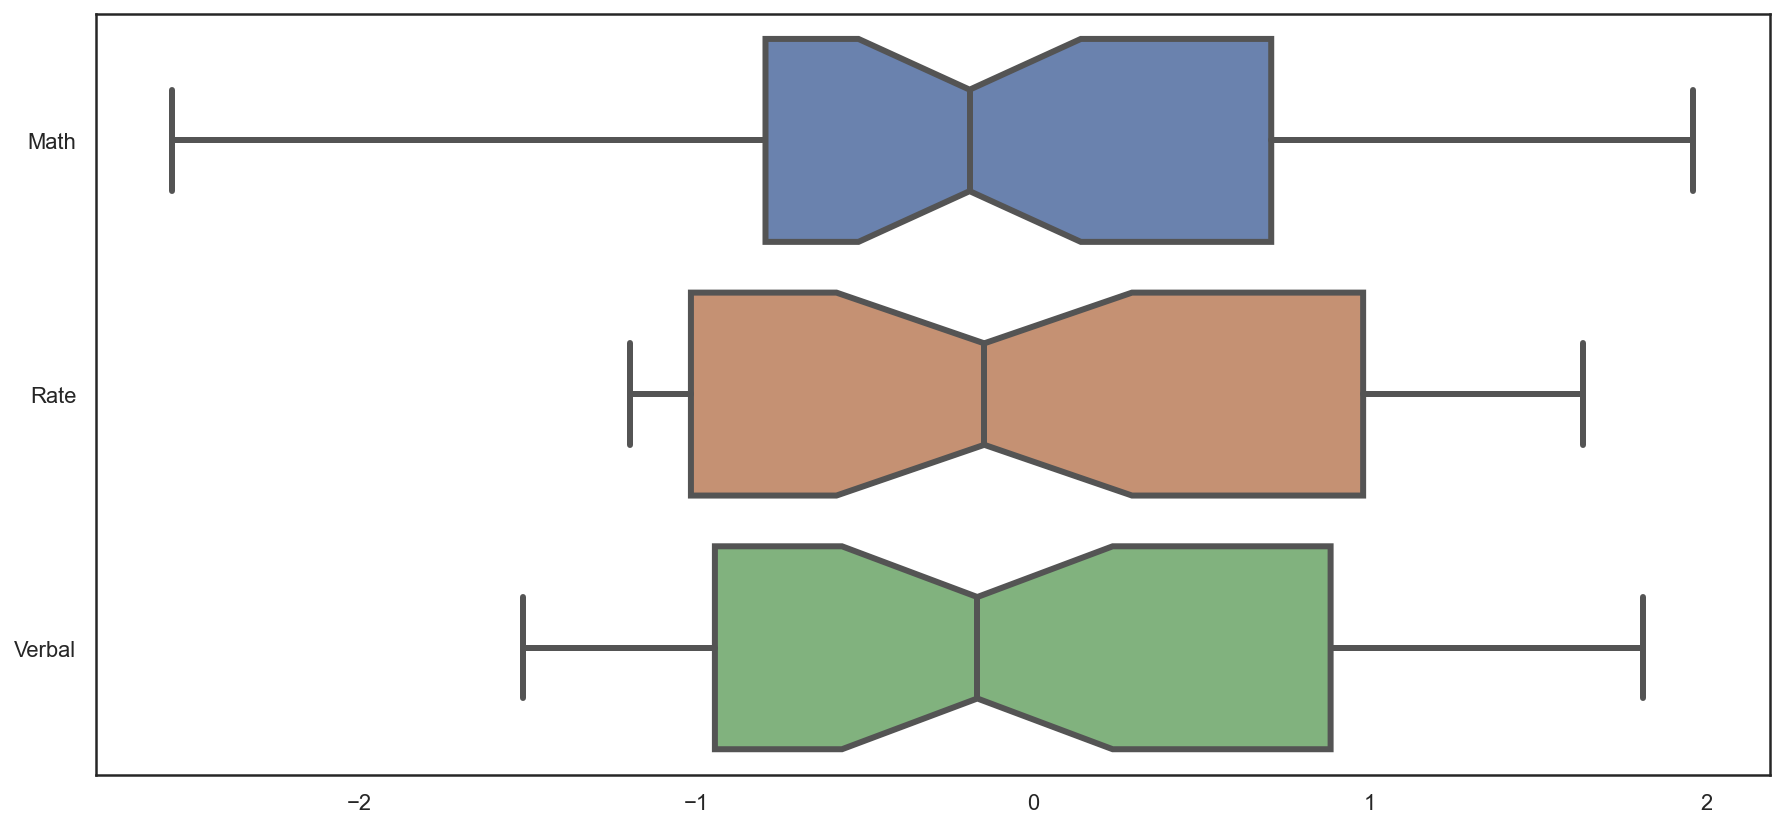

In [133]:
# This is Verbal, Math, and Rate appropriately on the same boxplot chart after creating a standardised Dataset

sat_scores_standardised = (sat_scores - sat_scores.mean()) / sat_scores.std() # Line of code to standardise the dataset

fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

ax = sns.boxplot(data=sat_scores_standardised[['Math', 'Rate','Verbal']], orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

#sns.boxplot(data = sat_scores_standardised.drop(['State'],axis = 1))

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [134]:
# Pull all the data required
sat_scores['Verbal'].head()

0    509
1    499
2    511
3    495
4    520
Name: Verbal, dtype: int64

In [135]:
# Find the mean by putting .mean() at the end
sat_scores['Verbal'].mean()

532.5294117647059

In [136]:
# Make a mask for all the rows that are higher than the mean
# sat_scores['Verbal'] > sat_scores['Verbal'].mean()

In [137]:
# Apply the mask to the column named 'State' using .loc
# Convert the list of states into a list by putting .to_list() at the end
sat_scores['State'].loc[sat_scores['Verbal'] > sat_scores['Verbal'].mean()].to_list()

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [138]:
print("The Verbal average was {}".format(sat_scores['Verbal'].mean()))
print("A number of {} out of  {} states had a verbal score above the average".format(len(sat_scores['State'].loc[sat_scores['Verbal'] > sat_scores['Verbal'].mean()]),len(sat_scores['State'])))
print("These states were: {}".format(sat_scores['State'].loc[sat_scores['Verbal'] > sat_scores['Verbal'].mean()].to_list()))

The Verbal average was 532.5294117647059
A number of 24 out of  51 states had a verbal score above the average
These states were: ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [139]:
# Find the median using .median()
sat_scores['Verbal'].median()

527.0

In [140]:
# Display the Column named 'State' where the column: 'Verbal' is greater than the median using .loc
# Convert to list as requested using .to_list()
sat_scores['State'].loc[sat_scores['Verbal'] > sat_scores['Verbal'].median()].to_list()

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [141]:
# Print a nested statement
print("The list of states that have Verbal scores greater than the median of Verbal scores across states is {}".format(sat_scores['State'].loc[sat_scores['Verbal'] > sat_scores['Verbal'].median()].to_list()))

The list of states that have Verbal scores greater than the median of Verbal scores across states is ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [142]:
# Create new columns with the gaps between Verbal and Math and vice verca
sat_scores_vmdiff = sat_scores.copy() # Create a copy first
sat_scores_vmdiff['Verbal - Math'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores_vmdiff['Math - Verbal'] = sat_scores['Math'] - sat_scores['Verbal'] # Created both out of curiosity
sat_scores_vmdiff

,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal
0,CT,82,509,510,-1,1
1,NJ,81,499,513,-14,14
2,MA,79,511,515,-4,4
3,NY,77,495,505,-10,10
4,NH,72,520,516,4,-4
5,RI,71,501,499,2,-2
6,PA,71,500,499,1,-1
7,VT,69,511,506,5,-5
8,ME,69,506,500,6,-6
9,VA,68,510,501,9,-9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [143]:
# Create two columns contaning the rank of the differences
# Start the rank with 1 as the highest so use .rank(ascending = False)
sat_scores_vmdiff['Rank of Verbal - Math'] = sat_scores_vmdiff['Verbal - Math'].rank(ascending = False)
sat_scores_vmdiff['Rank of Math - Verbal'] = sat_scores_vmdiff['Math - Verbal'].rank(ascending = False)
sat_scores_vmdiff

,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal,Rank of Verbal - Math,Rank of Math - Verbal
0,CT,82,509,510,-1,1,28.5,23.5
1,NJ,81,499,513,-14,14,49.0,3.0
2,MA,79,511,515,-4,4,36.0,16.0
3,NY,77,495,505,-10,10,44.5,7.5
4,NH,72,520,516,4,-4,14.5,37.5
5,RI,71,501,499,2,-2,18.0,34.0
6,PA,71,500,499,1,-1,21.5,30.5
7,VT,69,511,506,5,-5,12.0,40.0
8,ME,69,506,500,6,-6,9.5,42.5
9,VA,68,510,501,9,-9,6.0,46.0


In [144]:
# Use .sort_values(by = '') to sort the whole table based on the values of one column
# Use .iloc[:10] to display only the top 10
# 5.4.1 Your first DataFrame should be the 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math. It should be sorted appropriately to show the ranking of states.
sat_scores_vmdiff.sort_values(by = 'Rank of Verbal - Math').iloc[:10]

,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal,Rank of Verbal - Math,Rank of Math - Verbal
27,OH,26,534,439,95,-95,1.0,51.0
29,WV,18,527,512,15,-15,2.5,49.5
50,MS,4,566,551,15,-15,2.5,49.5
45,AR,6,562,550,12,-12,4.0,48.0
9,VA,68,510,501,9,-9,6.0,46.0
31,TN,13,562,553,9,-9,6.0,46.0
32,NM,13,551,542,9,-9,6.0,46.0
16,DC,56,482,474,8,-8,8.0,44.0
8,ME,69,506,500,6,-6,9.5,42.5
41,OK,8,567,561,6,-6,9.5,42.5


In [145]:
# 5.4.2. Your second DataFrame will be the inverse: states with the greatest gap between Verbal and Math such that Math is greater than Verbal. Again, this should be sorted appropriately to show rank.
sat_scores_vmdiff.sort_values(by = 'Rank of Math - Verbal').iloc[:10]

,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal,Rank of Verbal - Math,Rank of Math - Verbal
21,HI,52,485,515,-30,30,51.0,1.0
23,CA,51,498,517,-19,19,50.0,2.0
1,NJ,81,499,513,-14,14,49.0,3.0
33,IL,12,576,589,-13,13,48.0,4.0
44,WI,6,584,596,-12,12,47.0,5.0
36,MI,11,561,572,-11,11,46.0,6.0
3,NY,77,495,505,-10,10,44.5,7.5
47,IA,5,593,603,-10,10,44.5,7.5
37,MN,9,580,589,-9,9,43.0,9.0
49,ND,4,592,599,-7,7,42.0,10.0


In [146]:
# 5.4.3. Print the header of both variables, only showing the top 3 states in each.

In [147]:
# Pull just the top three rows of the sorted DataFrame by using .iloc[:3]
sat_scores_vmdiff.sort_values(by = 'Rank of Verbal - Math').iloc[:3]

,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal,Rank of Verbal - Math,Rank of Math - Verbal
27,OH,26,534,439,95,-95,1.0,51.0
29,WV,18,527,512,15,-15,2.5,49.5
50,MS,4,566,551,15,-15,2.5,49.5


In [148]:
# Show only the states by tacking ['State'] at the end
sat_scores_vmdiff.sort_values(by = 'Rank of Verbal - Math').iloc[:3]['State']

27    OH
29    WV
50    MS
Name: State, dtype: object

In [149]:
# Convert to a list by tacking .to_list() at the end
sat_scores_vmdiff.sort_values(by = 'Rank of Verbal - Math').iloc[:3]['State'].to_list()

['OH', 'WV', 'MS']

In [150]:
# Repeat process for vice verca
sat_scores_vmdiff.sort_values(by = 'Rank of Math - Verbal').iloc[:3]

,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal,Rank of Verbal - Math,Rank of Math - Verbal
21,HI,52,485,515,-30,30,51.0,1.0
23,CA,51,498,517,-19,19,50.0,2.0
1,NJ,81,499,513,-14,14,49.0,3.0


In [151]:
# Repeat process for vice verca
sat_scores_vmdiff.sort_values(by = 'Rank of Math - Verbal').iloc[:3]['State']

21    HI
23    CA
1     NJ
Name: State, dtype: object

In [152]:
# Repeat process for vice verca
sat_scores_vmdiff.sort_values(by = 'Rank of Math - Verbal').iloc[:3]['State'].to_list()

['HI', 'CA', 'NJ']

In [153]:
# Print an answer-statement for the question
print("The top three states which has the highest difference in Verbal scores compared to Math are: {}\n\nThe top three states for vice versa are: {}".format(sat_scores_vmdiff.sort_values(by = 'Rank of Verbal - Math').iloc[:3]['State'].to_list(),sat_scores_vmdiff.sort_values(by = 'Rank of Math - Verbal').iloc[:3]['State'].to_list()))

The top three states which has the highest difference in Verbal scores compared to Math are: ['OH', 'WV', 'MS']

The top three states for vice versa are: ['HI', 'CA', 'NJ']


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [154]:
sat_scores.corr()
# What does the correlation matrix tell you?
    # There is a positive correlation between Math Scores and Verbal Scores, as one increases, so does the other
    # Rate is negatively correlated to both Math Scores and Verbal Scores, as Rate increases both Math Scores and Verbal Scores decreases
    # Teacher-to-Student Ratio might have an influence on this data

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [155]:
#6.2.0 Use pandas' .describe() built-in function on your DataFrame
display(
    sat_scores.describe().T,
    sat_scores_standardised.describe().T
    )

,count,mean,std,min,25%,50%,75%,max
Rate,51.0,37.000000,27.550681,4.0,9.0,33.0,64.0,82.0
Verbal,51.0,532.529412,33.360667,482.0,501.0,527.0,562.0,593.0
Math,51.0,531.843137,36.287393,439.0,503.0,525.0,557.5,603.0


,count,mean,std,min,25%,50%,75%,max
Math,51.0,-8.424634e-16,1.0,-2.558551,-0.794853,-0.188582,0.707046,1.960925
Rate,51.0,8.707632e-18,1.0,-1.197793,-1.016309,-0.145187,0.980012,1.633353
Verbal,51.0,9.447780e-16,1.0,-1.514640,-0.945107,-0.165746,0.883393,1.812631


In [156]:
# 6.2.1 Write up what each of the rows returned by the function indicate

    # count - The number of values in the column
    # mean - The average of all values in the column
    # std - The standard devaition of all values in the column
    # min - The lowest value in the column
    # 25% - The Q1 value of all values in the column
    # 50% - The Q2 value of all values in the column (a.k.a: The Median)
    # 75% - The Q3 value of all values in the column
    # max - The higest value in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [157]:
# 6.3.0 Assign and print the covariance matrix for the dataset
sat_scores.cov()

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


In [158]:
# 6.3.1 Describe how the covariance matrix is different from the correlation matrix.
    # Correlation will only ever ben between -1 and +1
    # Covariance measures the strength of correlation between variables and can be any real number 

In [159]:
# 6.3.2 What is the process to convert the covariance into the correlation?
    # Divide the covariance by the product of the standard deviations of both the variables

In [160]:
# 6.3.3 Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
    # Correlation is not influenced by the change in scale. Covariance is affected by the change in scale. 
    # Correlation measures both the strength and direction of the linear relationship between two variables whilst covariance only indicates the direction of the linear relationship between variables.
    
    # Source: https://www.mygreatlearning.com/blog/covariance-vs-correlation/

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [161]:
# N2S: Check https://www.python-graph-gallery.com/

In [162]:
# Does this data require cleaning? -  
    # Most certainly. 
    # After reading https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age it seems all dtypes ought to be float64
    # Such a blunder will render all values in a particular column unrecognisable to certain libraries.

# Are variables missing? 
    # Yes, there a some dashes in the data


# How will this affect your approach to EDA on the data?
    # Objects won't show in any correlation or covariace calculations



drugdata = pd.read_csv('drug-use-by-age.csv')

#Create age-columns with assumtion that same habbit are kept will next age bracket
drugdata['age_grouped_min'] = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 30, 35, 50, 65]
drugdata['age_grouped_min'].dtype
drugdata

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_grouped_min
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0,12
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,13
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,14
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,15
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,16
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,17
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,18
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,19
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,20
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,21


In [163]:
drugdata[['age', 'age_grouped_min']]

,age,age_grouped_min
0,12,12
1,13,13
2,14,14
3,15,15
4,16,16
5,17,17
6,18,18
7,19,19
8,20,20
9,21,21


In [164]:
display(
    drugdata.columns,
    drugdata.shape,
    drugdata.dtypes,
    drugdata.describe().T.sort_values(by = 'std', ascending  = False)
    )

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency', 'age_grouped_min'],
      dtype='object')

(17, 29)

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
age_grouped_min     

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
stimulant-frequency,17.0,31.147059,85.973790,2.0,7.0,10.0,12.0,364.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
sedative-frequency,17.0,19.382353,24.833527,3.0,6.5,10.0,17.5,104.0
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0
age_grouped_min,17.0,24.529412,14.058439,12.0,16.0,20.0,26.0,65.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
tranquilizer-frequency,17.0,11.735294,11.485205,4.5,6.0,10.0,11.0,52.0


In [165]:
# Replace the dashes with NaNs or zeros
drugdata_with_nans = drugdata.replace('-', np.nan)
drugdata_with_zeros = drugdata.replace('-', 0)
drugdata_with_nans
#drugdata_with_zeros

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_grouped_min
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0,12
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,13
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,14
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,15
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,16
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,17
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,18
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,19
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,20
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,21


In [166]:
display(
drugdata_with_nans.describe().T,
drugdata_with_nans.dtypes,
drugdata_with_zeros.describe().T,
drugdata_with_zeros.dtypes
    )

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0


age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
age_grouped_min     

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0


age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
age_grouped_min     

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [167]:
mask_ut=np.triu(np.ones(drugdata.shape)).astype(np.bool)

<ipython-input-167-ce1309a94f39>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(drugdata.shape)).astype(np.bool)


<ipython-input-168-df87bbf07f18>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(drugdata.shape)).astype(np.bool)


<AxesSubplot:>

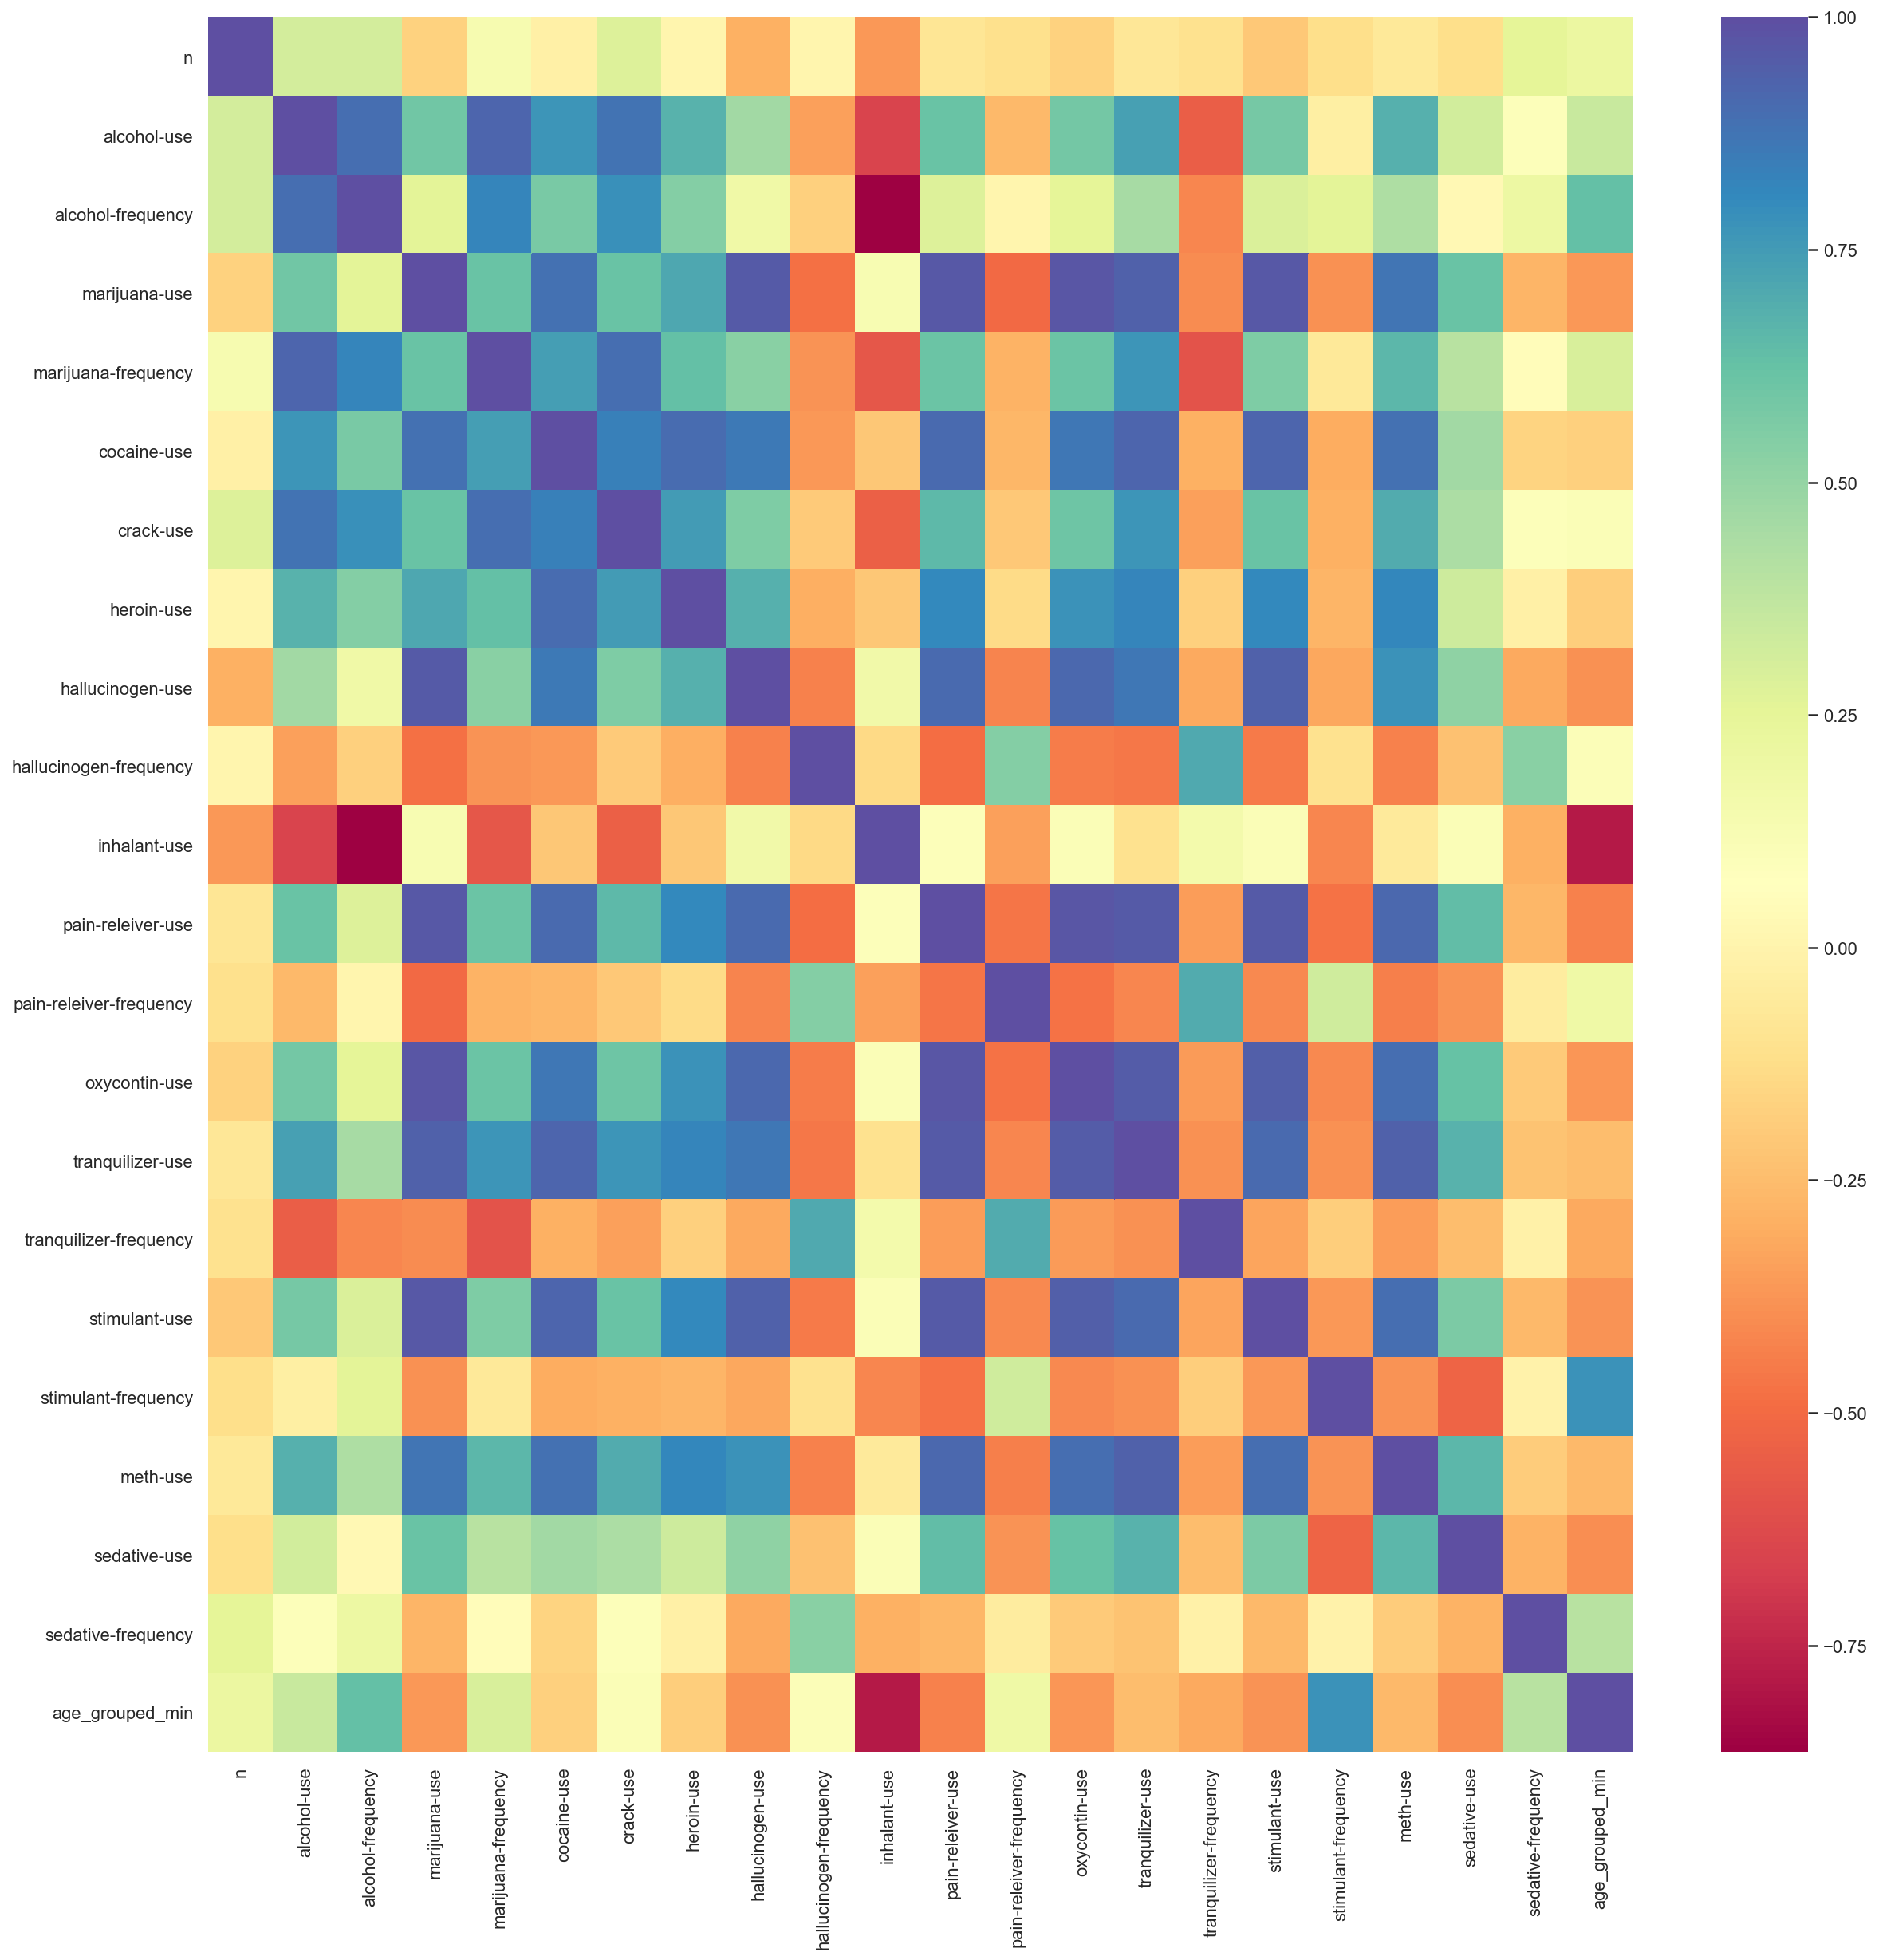

In [168]:
plt.subplots(figsize=(20,20))
mask_ut=np.triu(np.ones(drugdata.shape)).astype(np.bool)
sns.heatmap(drugdata.replace('-', np.nan).corr(), cmap="Spectral")
# More tips on https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/

In [169]:
# sns.pairplot(drugdata_with_nans)
# Leave as commented-out it slows system

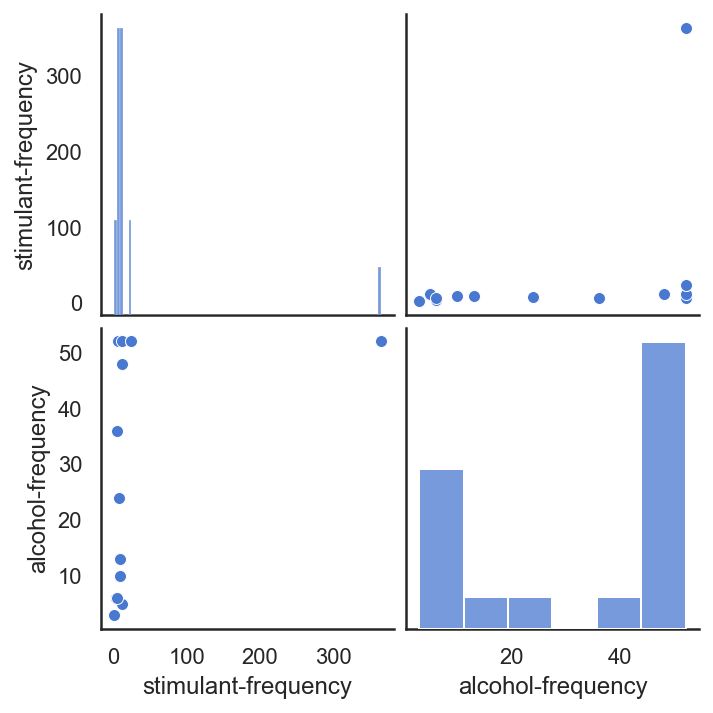

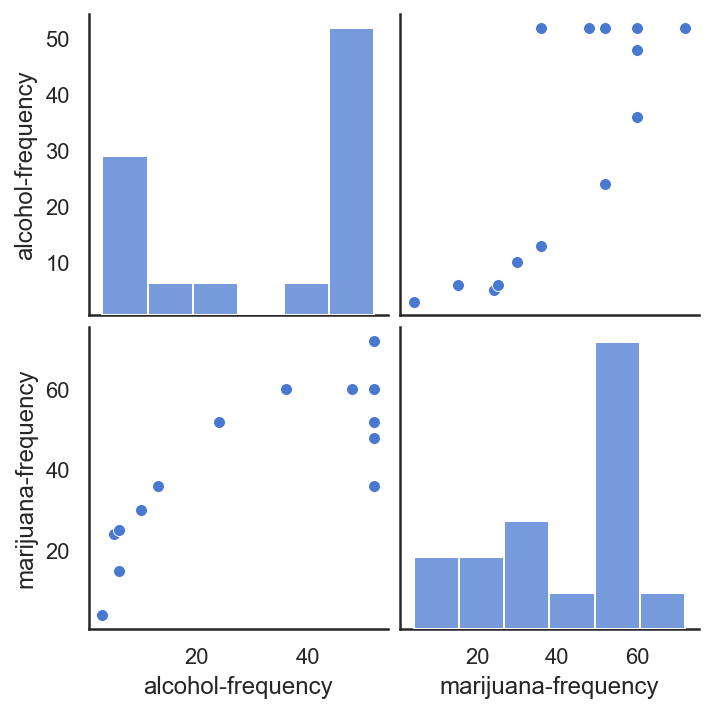

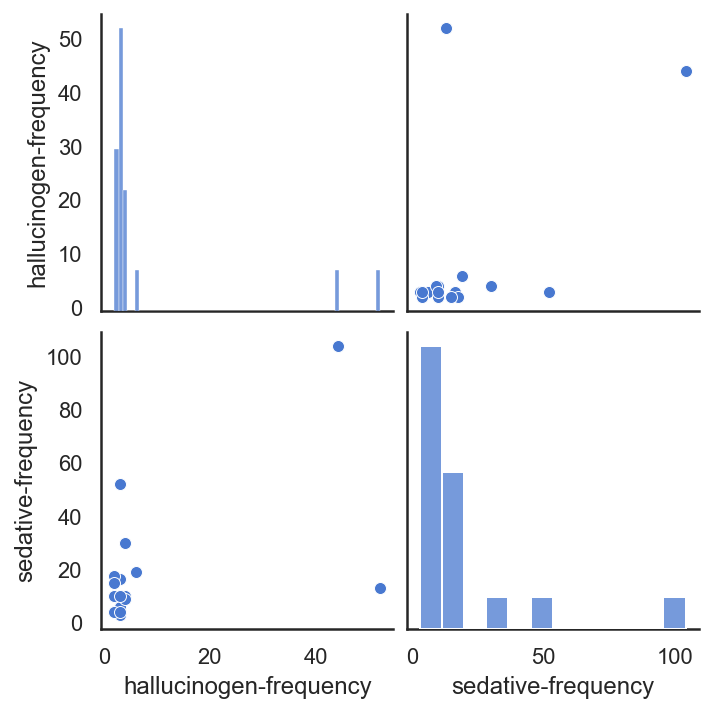

In [170]:
# Show pairplots for Top 3 strongest Covariance

sns.pairplot(drugdata_with_nans[['stimulant-frequency', 'alcohol-frequency']])
sns.pairplot(drugdata_with_nans[['alcohol-frequency', 'marijuana-frequency']])
sns.pairplot(drugdata_with_nans[['hallucinogen-frequency','sedative-frequency']])

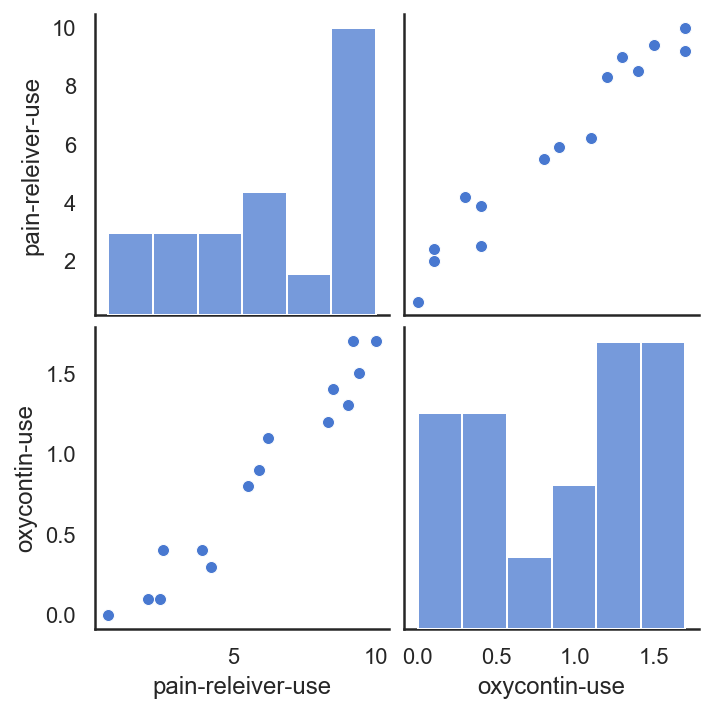

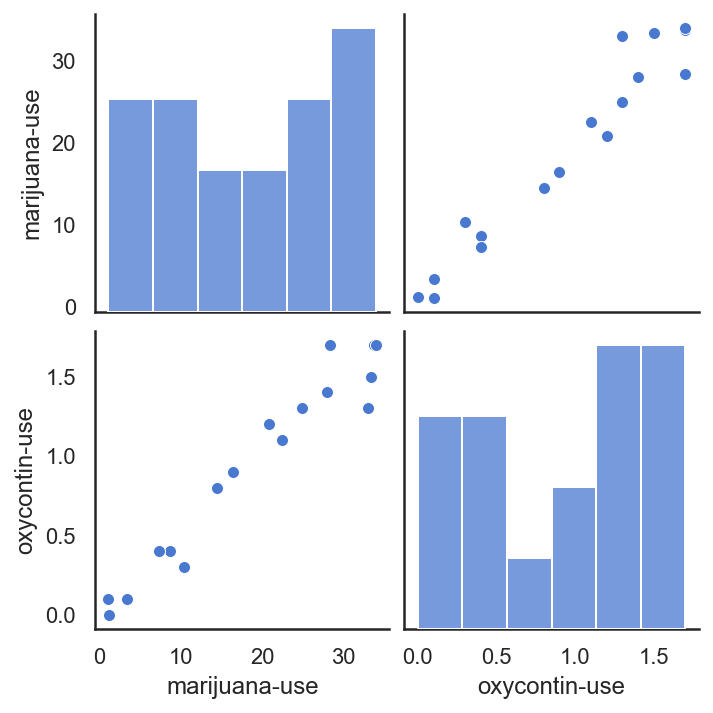

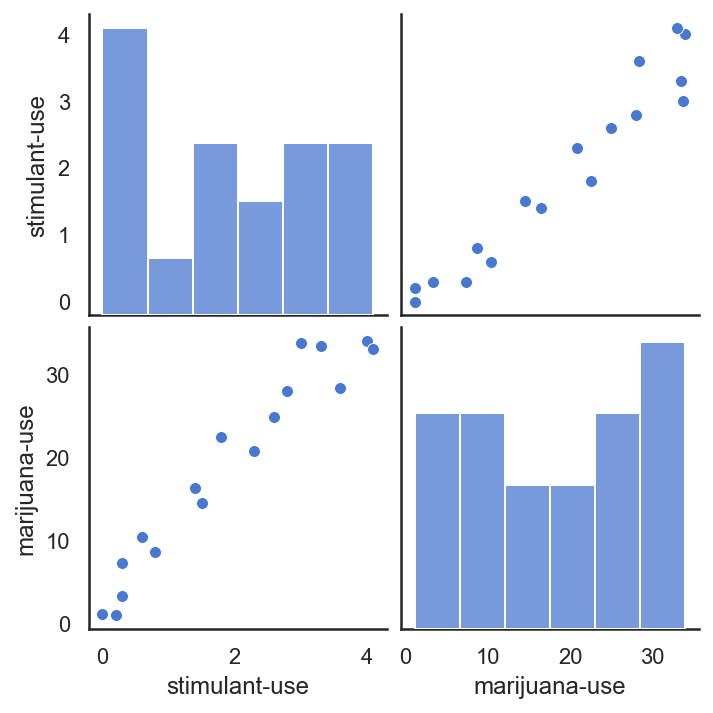

In [171]:
# Show pairplot for Top 3 Most Positively Correllated Variables

    # pain-releiver-use	oxycontin-use	0.976445	1.880478e+00
    # marijuana-use	oxycontin-use	0.971733	7.068493e+00
    # stimulant-use	marijuana-use	0.968096	1.629831e+01

sns.pairplot(drugdata_with_nans[['pain-releiver-use','oxycontin-use']])
sns.pairplot(drugdata_with_nans[['marijuana-use','oxycontin-use']])
sns.pairplot(drugdata_with_nans[['stimulant-use','marijuana-use']])

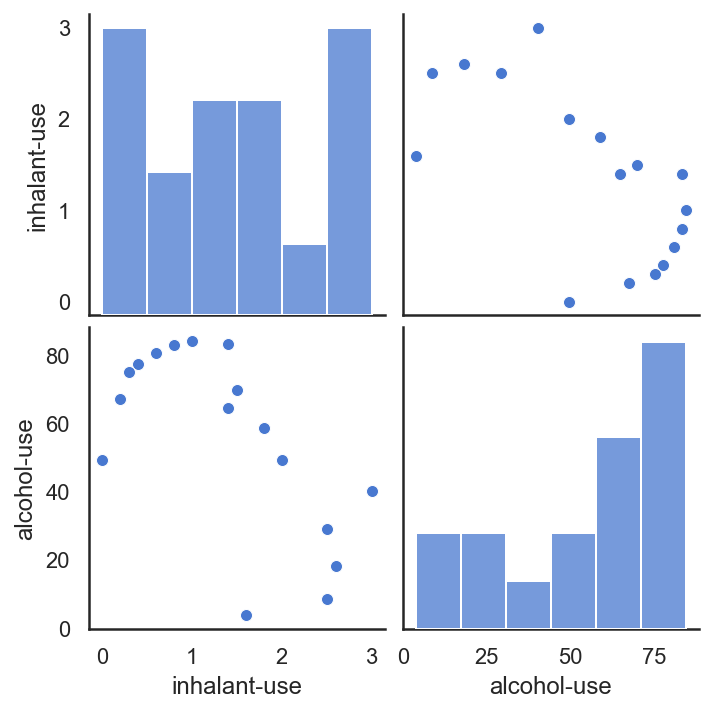

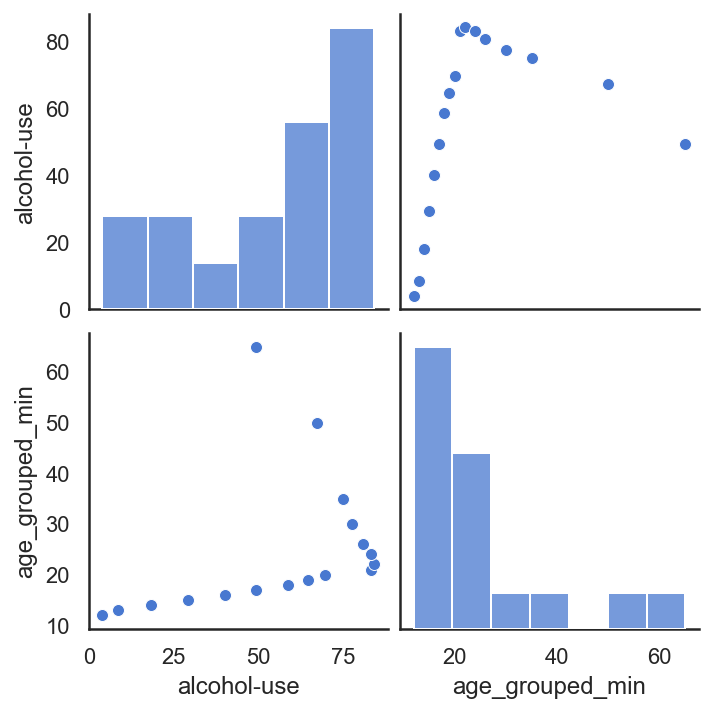

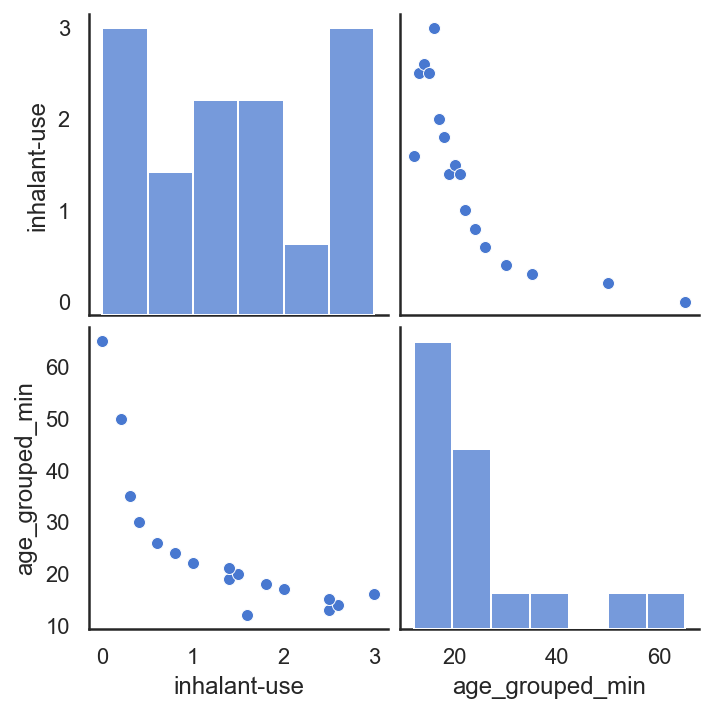

In [172]:
# Plot data for 

sns.pairplot(drugdata_with_nans[['inhalant-use','alcohol-use']])
sns.pairplot(drugdata_with_nans[['alcohol-use','age_grouped_min']])
sns.pairplot(drugdata_with_nans[['inhalant-use','age_grouped_min']])

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [173]:
# dsi-unit-2.12-statistics-hypothesis_testing_ttest_pvalues-lesson
def sample_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    dev1 = np.sum([(x - np.mean(sample1))**2 for x in sample1])
    dev2 = np.sum([(x - np.mean(sample2))**2 for x in sample2])
    s2 = float(dev1 + dev2) / (n1 + n2 - 2)
    return s2

In [174]:
# dsi-unit-2.12-statistics-hypothesis_testing_ttest_pvalues-lesson
def t_statistic(expr, ctrl):
    s2 = sample_variance(expr, ctrl)
    mean1 = np.mean(expr)
    mean2 = np.mean(ctrl)
    std = np.sqrt(s2 * (1./len(expr) + 1./len(ctrl)))
    return float(mean1 - mean2) / std

** Question and deliverables**


...

In [175]:
# 7.3.1 Write a specific question you would like to answer with the data (that can be accomplished with EDA)

    # Which drugs are most likely to have overlapping effects?
    # Which drugs are least likely to be consumed by the same user?


In [176]:
# 7.3.2 Write a description of the "deliverables": what will you report after testing/examining your hypothesis?

#My Deliverable will have Nine (9) Pair Variables:
    # Find the top 3 pairs of variables with the Strongest Covariance
    # Find the top 3 pairs of variables which are most Positively Correlated
    # Find the top 3 pairs of variables which are most Negatively Correlated 

    

In [177]:
# 7.3.3 Use EDA techniques of your choice, numeric and/or visual, to look into your question.

stacked_corr = pd.DataFrame(drugdata_with_nans.corr().stack()).reset_index() # Create a correlation matrix, stack it then reset the index
stacked_corr.columns = ['Drug A', 'Drug 1', 'Correlation'] # Rename the columns of the stacked Correlation DataFrame
stacked_cov = pd.DataFrame(drugdata_with_nans.cov().stack()).reset_index() # Create a covariance matrix, stack it then reset the index
stacked_cov.columns = ['Drug A', 'Drug 1', 'Covariance'] # Rename the columns of the stacked Covariance DataFrame
stacked_corr02_reset_index = stacked_corr.copy()
stacked_corr03_added_cov = stacked_corr02_reset_index.copy() # Create copy for safe measure
stacked_corr03_added_cov['Covariance'] = stacked_cov['Covariance'] # Covariance column into Correlation DataFrame
stacked_corr03_added_cov.columns = ['Drug A', 'Drug 1', 'Correlation', 'Covariance'] #Ensure all columns are named appropriately
stacked_corr03_added_cov.to_csv('stacked_corr03_added_cov.csv')
stacked_corr03_added_cov # Display your newly created, stacked and merged table with both Correlation and Covariance


# Uses for sorting this DataFrame:
    # Find the pair of variables with the Strongest Covariance
    # Find the pair of variables which are most Positively Correlated 
    # Find the pair of variables which are most Negatively Correlated 

,Drug A,Drug 1,Correlation,Covariance
0,n,n,1.000000,1.684520e+06
1,n,alcohol-use,0.310512,1.083245e+04
2,n,alcohol-frequency,0.313431,8.672478e+03
3,n,marijuana-use,-0.169007,-2.623408e+03
4,n,marijuana-frequency,0.135597,3.231629e+03
...,...,...,...,...
479,age_grouped_min,stimulant-frequency,0.778792,9.412923e+02
480,age_grouped_min,meth-use,-0.261252,-9.650735e-01
481,age_grouped_min,sedative-use,-0.394353,-7.650735e-01
482,age_grouped_min,sedative-frequency,0.396722,1.385037e+02


In [178]:
stacked_corr03_added_cov

,Drug A,Drug 1,Correlation,Covariance
0,n,n,1.000000,1.684520e+06
1,n,alcohol-use,0.310512,1.083245e+04
2,n,alcohol-frequency,0.313431,8.672478e+03
3,n,marijuana-use,-0.169007,-2.623408e+03
4,n,marijuana-frequency,0.135597,3.231629e+03
...,...,...,...,...
479,age_grouped_min,stimulant-frequency,0.778792,9.412923e+02
480,age_grouped_min,meth-use,-0.261252,-9.650735e-01
481,age_grouped_min,sedative-use,-0.394353,-7.650735e-01
482,age_grouped_min,sedative-frequency,0.396722,1.385037e+02


In [179]:
# 7.3.3 Use EDA techniques of your choice, numeric and/or visual, to look into your question.
# Find out which variables have the strongest Covariance
stacked_corr03_added_cov.sort_values(by = 'Covariance', ascending = False)[:31]

# Exclude 'n', exclude if same drug
# Compare only 'frequency' with frequency and 'use' with 'use'

#Findings: Top 3 of Strongest Covariance
    # stimulant-frequency	alcohol-frequency	0.260304	4.771011e+02
    # alcohol-frequency	marijuana-frequency	0.818769	3.205221e+02
    # hallucinogen-frequency	sedative-frequency	0.533095	1.985827e+02

,Drug A,Drug 1,Correlation,Covariance
0,n,n,1.000000,1.684520e+06
1,n,alcohol-use,0.310512,1.083245e+04
22,alcohol-use,n,0.310512,1.083245e+04
2,n,alcohol-frequency,0.313431,8.672478e+03
44,alcohol-frequency,n,0.313431,8.672478e+03
440,sedative-frequency,n,0.256701,8.273789e+03
20,n,sedative-frequency,0.256701,8.273789e+03
391,stimulant-frequency,stimulant-frequency,1.000000,7.391493e+03
462,age_grouped_min,n,0.209636,3.825092e+03
21,n,age_grouped_min,0.209636,3.825092e+03


In [180]:
# 7.3.3 Use EDA techniques of your choice, numeric and/or visual, to look into your question.
# Find out Most Positively Correllated Variables
stacked_corr03_added_cov.sort_values(by = 'Correlation', ascending = False)[:41]

# Exclude 'n', 
# Exclude if same drug
# Exclude self-to-self
# Compare only 'frequency' with 'frequency' and 'use' with 'use'


# Findings: Top 3 Most Positively Correllated Values
    # pain-releiver-use	oxycontin-use	0.976445	1.880478e+00
    # marijuana-use	oxycontin-use	0.971733	7.068493e+00
    # stimulant-use	marijuana-use	0.968096	1.629831e+01

,Drug A,Drug 1,Correlation,Covariance
0,n,n,1.000000,1.684520e+06
253,pain-releiver-use,pain-releiver-use,1.000000,1.002596e+01
69,marijuana-use,marijuana-use,1.000000,1.430357e+02
92,marijuana-frequency,marijuana-frequency,1.000000,3.371838e+02
115,cocaine-use,cocaine-use,1.000000,3.300662e+00
138,crack-use,crack-use,1.000000,5.558824e-02
161,heroin-use,heroin-use,1.000000,1.113971e-01
184,hallucinogen-use,hallucinogen-use,1.000000,7.798088e+00
207,hallucinogen-frequency,hallucinogen-frequency,1.000000,2.250074e+02
230,inhalant-use,inhalant-use,1.000000,8.598529e-01


In [181]:
# 7.3.3 Use EDA techniques of your choice, numeric and/or visual, to look into your question.
# Find the Most Negatively Correllated Values
stacked_corr03_added_cov.sort_values(by = 'Correlation', ascending = True)[61:81]

# Exclude 'n', 
# Exclude if same drug
# Exclude self-to-self
# Compare only 'frequency' with 'frequency' and 'use' with 'use'

# Exclude self-to-self, exlude same-drug


# Findings: Most Negatively Correllated Values
    # inhalant-use	alcohol-use	-0.648248	-16.157132
    # tranquilizer-frequency	marijuana-frequency	-0.591449	-124.735294
    # inhalant-use	crack-use	-0.543499	-0.118824

,Drug A,Drug 1,Correlation,Covariance
323,tranquilizer-use,tranquilizer-frequency,-0.388954,-7.832721
197,hallucinogen-use,age_grouped_min,-0.387573,-15.215441
470,age_grouped_min,hallucinogen-use,-0.387573,-15.215441
388,stimulant-frequency,tranquilizer-use,-0.384431,-57.950919
325,tranquilizer-use,stimulant-frequency,-0.384431,-57.950919
373,stimulant-use,age_grouped_min,-0.382329,-7.566176
478,age_grouped_min,stimulant-use,-0.382329,-7.566176
97,marijuana-frequency,hallucinogen-frequency,-0.380430,-104.786765
202,hallucinogen-frequency,marijuana-frequency,-0.380430,-104.786765
283,pain-releiver-frequency,sedative-use,-0.378001,-0.361765


In [182]:
# 7.3.4 Write up your report on what you have found regarding the hypothesis about the data you came up with.

**Q: 7.3.4: Report (Attempt 1)**

## Executive Summary

This reports my findings as I sought to answer the following questions:

    Which drugs are most likely to have overlapping effects?
    Which drugs are least likely to be consumed by the same user?



## Introduction

Use provided data on drugs to find the find nine pairs which would be the top 3 pairs of drugs:

    - with the Strongest Covariance
    - which are most Positively Correlated    
    - which are most Negatively Correlated 

Exclusions:

    - Exclude 'n'
    - Exlude values between '-frequency' and '-use'


## Findings

### Top 3 with the Strongest Covariance:
 
     stimulant-frequency	vs	alcohol-frequency			4.771011e+02
     alcohol-frequency		vs	marijuana-frequency			3.205221e+02
     hallucinogen-frequency	vs	sedative-frequency			1.985827e+02



### Top 3 Most Positively Correllated Values:
 
     pain-releiver-use	vs	oxycontin-use		0.976445
     marijuana-use		vs	oxycontin-use			0.971733
     stimulant-use		vs	marijuana-use			0.968096

All strong positively correllated pairs relate to use father than frequency, this could be a reflection on overlapping effects.


### Top 3 Most Negatively Correllated Values:
 
     inhalant-use				vs	alcohol-use						-0.648248
     tranquilizer-frequency		vs	marijuana-frequency		-0.591449
     inhalant-use				vs	crack-use						-0.543499



### Conclusions


The drugs which are most likely to have overlapping effects are:

    Pain-releiver, oxycontin and marijuana



The drugs which are least likely to be consumed by the same user are:

    Inhalant users are less likely to be alcohol users or crack users
    Tranquilizer is unlikely to be consumed when marijuana has been recently used and vice-verca, if by the same user.
    
...

In [183]:
# Start Attempt 2 for Q: 7.3.4: Report from here on:


### Q 7.3.1. Write a specific question you would like to answer with the data (that can be accomplished with EDA). (Attempt II)

    The specific question you would like to answer with the drug data is whether there is a measurable and numerically disprovable preference to using inhalants for users older vs younger than 18 with a confidence level greater than 95%



### Q 7.3.2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis? (Attempt II)


To test this hypothesis I assert the following:        




$$H0 : P(\text{inhalant-use}\;|\;\text{age}≤18)  ==  P(\text{inhalant-use}\;|\;\text{age} > 18)$$
$$H1 : P(\text{inhalant-use}\;|\;\text{age}≤18)  !=  P(\text{inhalant-use}\;|\;\text{age} > 18)$$




My deliverables will include visual depiction of correllations, probability densities and finally the T-Statistic and the P-Value < .00004



### Q 7.3.3. Use EDA techniques of your choice, numeric and/or visual, to look into your question. (Attempt II)


The following diagram is a scatter plot between 'inhalant-use' vs 'age_grouped_min'.

I take note of the overall negative direction as age approaches positive infinity.


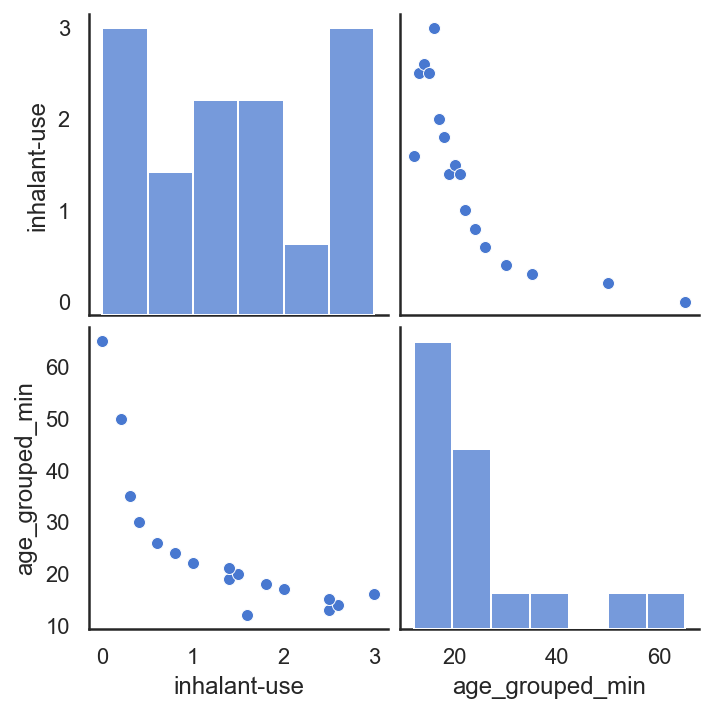


The image below depics the count of the values with the steelblue bring for 'age ≤ 18' and darkred for 'age > 18'

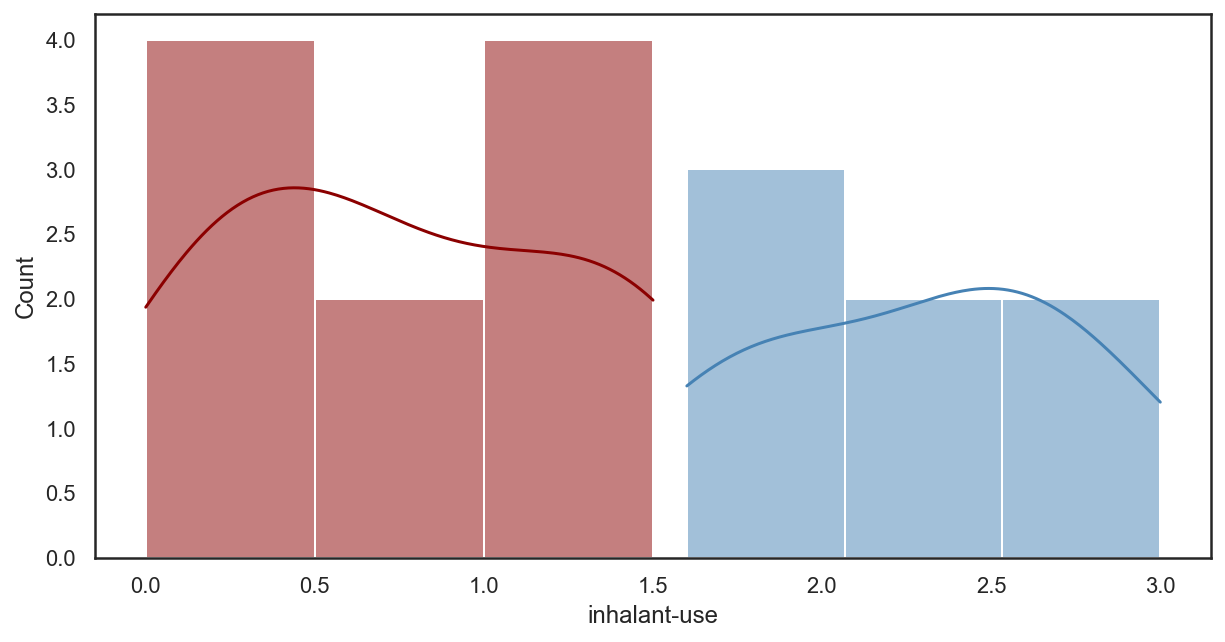

The image below depics the probablility density of inhalant-use | age ≤ 18 in blue and inhalant-use | age > 18 in orange

It has a clearly visible and offset between the peaks.

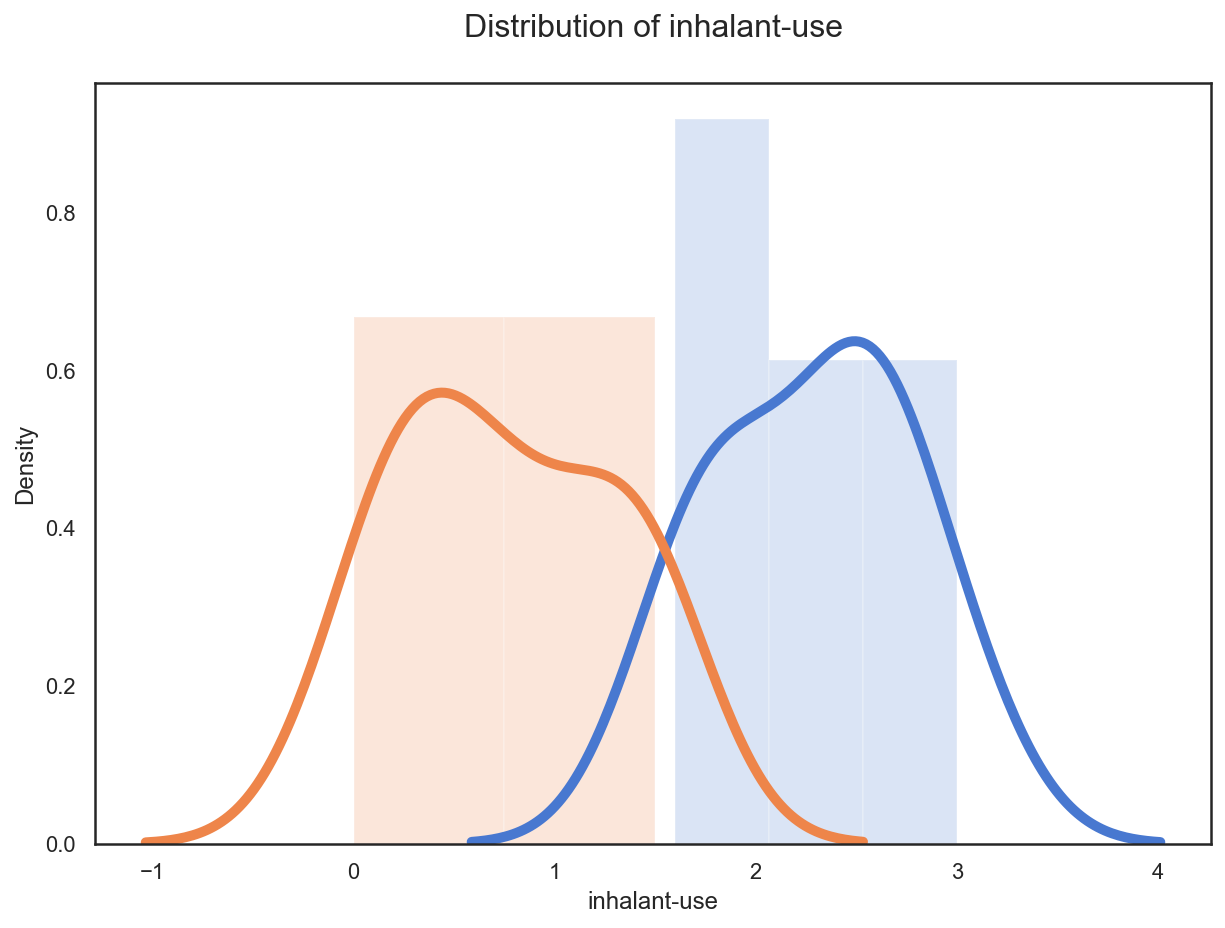






### Q 7.3.4. Write up your report on what you have found regarding the hypothesis about the data you came up with. (Attempt II)

Using the following code I found my deliverables:

`import scipy.stats as stats
stats.ttest_ind(inhalant_use_18andunder,inhalant_use_19andover)`

    T-Statistic = 5.87005
        P-Value < .00004



Since P-Value is far less than 0.05, we reject the Null Hypothesis. 

Therefore 99.99692015385199% of samples, there will be a change in preference towards inhalant-use for participants aged 19 or older in comparison to other 18 or younger.



Ttest_indResult(statistic=5.870046094563752, pvalue=0.00003079846148015655)


In [184]:
#    H0: *p*(inhalant-use | age <= 18) == *p*(inhalant-use | age > 18) 
#    H1: *p*(inhalant-use | age <= 18) != *p*(inhalant-use | age > 18)

In [185]:

# dsi-unit-2.12-statistics-hypothesis_testing_ttest_pvalues-lesson
    # stats.ttest_ind(experimental, control)
# Confidence- Level --> Z-Score
# 
# drugdata_with_nans[['inhalant-use', 'age_grouped_min']]
age_barrier = 18
inhalant_use_18andunder = drugdata_with_nans['inhalant-use'][drugdata_with_nans['age_grouped_min']<= age_barrier]
inhalant_use_19andover = drugdata_with_nans['inhalant-use'][drugdata_with_nans['age_grouped_min']> age_barrier]
display(
    inhalant_use_18andunder,
    inhalant_use_19andover
    )

0    1.6
1    2.5
2    2.6
3    2.5
4    3.0
5    2.0
6    1.8
Name: inhalant-use, dtype: float64

7     1.4
8     1.5
9     1.4
10    1.0
11    0.8
12    0.6
13    0.4
14    0.3
15    0.2
16    0.0
Name: inhalant-use, dtype: float64

In [186]:
pd.DataFrame(inhalant_use_18andunder)

,inhalant-use
0,1.6
1,2.5
2,2.6
3,2.5
4,3.0
5,2.0
6,1.8


In [187]:
display(
    np.mean(inhalant_use_18andunder),
    np.mean(inhalant_use_19andover),
    np.mean(inhalant_use_18andunder - np.mean(inhalant_use_19andover))
)

2.2857142857142856

0.76

1.5257142857142856

In [188]:
inhalant_use_18andunder.shape

(7,)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


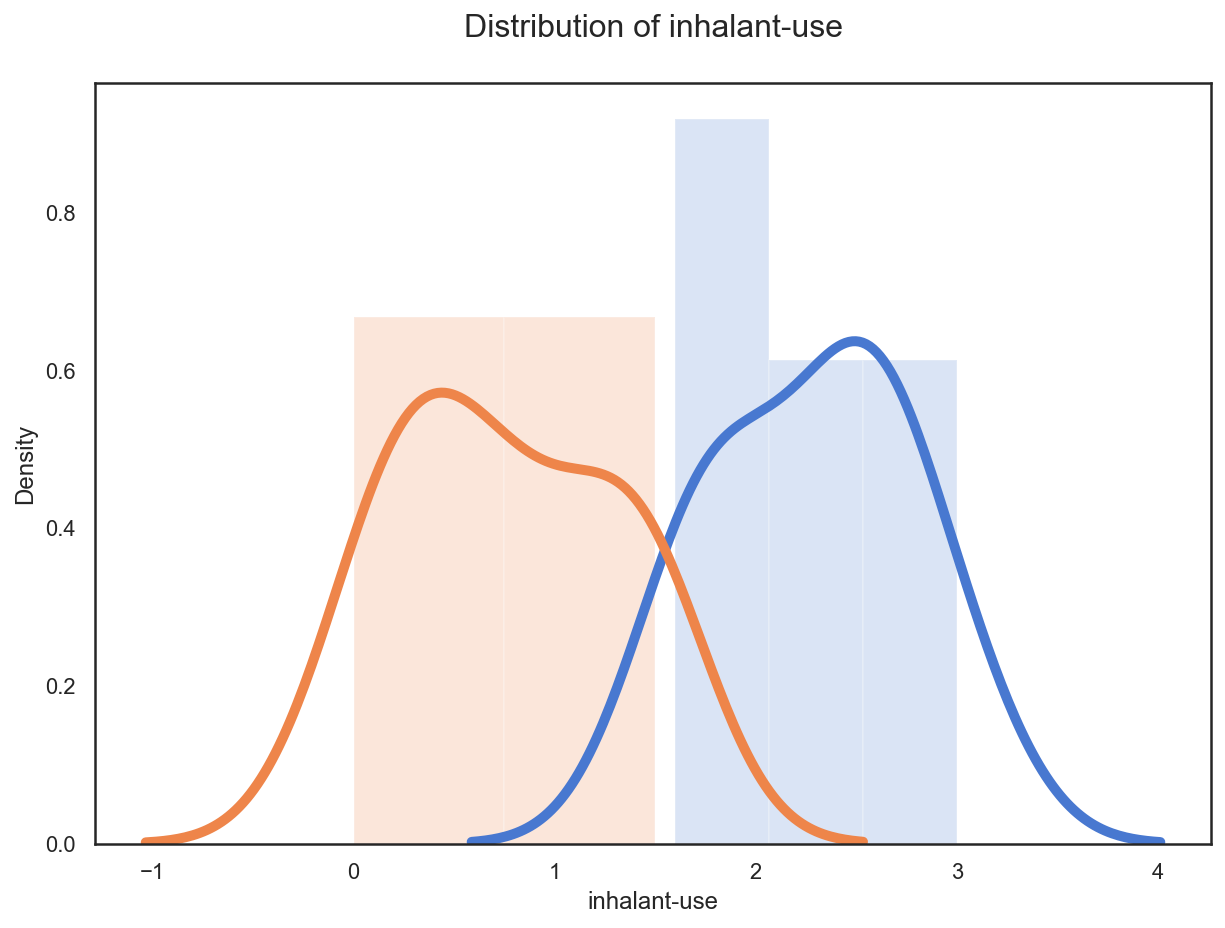

In [189]:
distribution_plotter('inhalant-use',pd.DataFrame(inhalant_use_18andunder))
distribution_plotter('inhalant-use',pd.DataFrame(inhalant_use_19andover))

<AxesSubplot:xlabel='inhalant-use', ylabel='Count'>

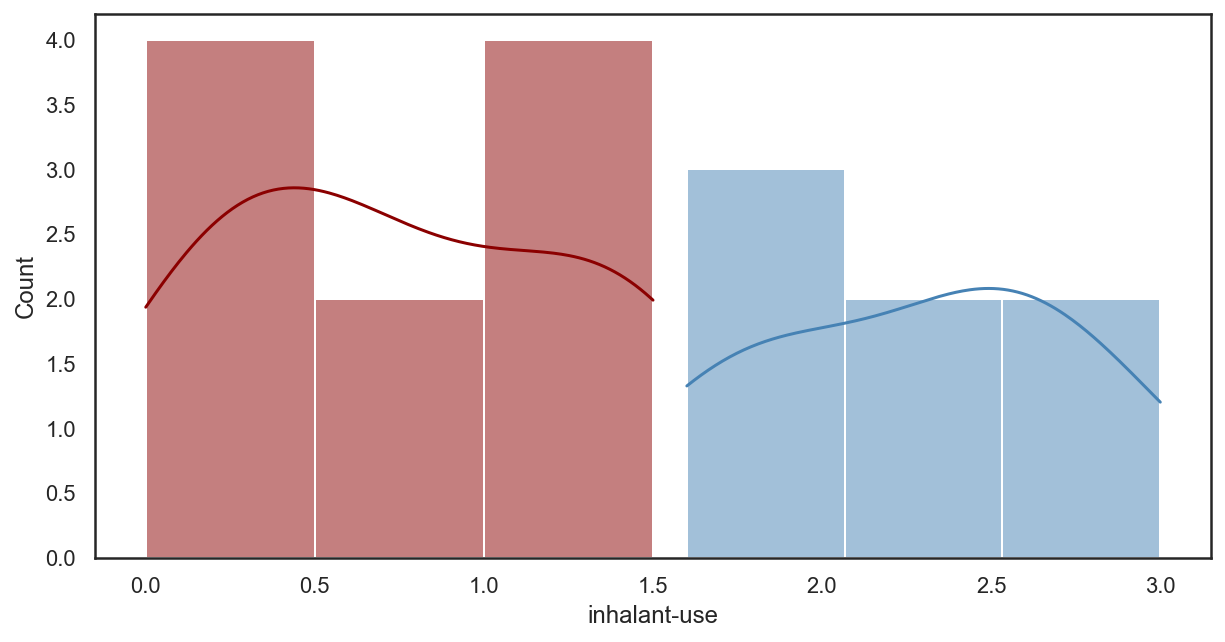

In [190]:
# dsi-unit-2.12-statistics-hypothesis_testing_ttest_pvalues-lesson

# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(10,5))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis and also returning it:
# first plot group 1:
ax = sns.histplot(inhalant_use_18andunder, bins=3, color='steelblue', ax=ax, kde=True)

# create another distribution on the same axis for group 2:
sns.histplot(inhalant_use_19andover, bins=3, color='darkred', ax=ax, kde=True)

In [191]:
print("Sample Variance:")
display(
sample_variance(inhalant_use_18andunder,inhalant_use_19andover),
sample_variance(inhalant_use_19andover,inhalant_use_18andunder)
    )

Sample Variance:


0.27817142857142857

0.27817142857142857

In [192]:
display(
t_statistic(inhalant_use_18andunder,inhalant_use_19andover),
t_statistic(inhalant_use_19andover,inhalant_use_18andunder)
    )

5.870046094563752

-5.870046094563752

In [193]:
display(
stats.ttest_ind(inhalant_use_18andunder,inhalant_use_19andover),
stats.ttest_ind(inhalant_use_19andover,inhalant_use_18andunder)
    )

Ttest_indResult(statistic=5.870046094563752, pvalue=3.079846148015655e-05)

Ttest_indResult(statistic=-5.870046094563752, pvalue=3.079846148015655e-05)

In [194]:
print("T-Stat = {}".format(stats.ttest_ind(inhalant_use_18andunder,inhalant_use_19andover)[0]))
print("P-Val = {}".format(stats.ttest_ind(inhalant_use_18andunder,inhalant_use_19andover)[1]))

T-Stat = 5.870046094563752
P-Val = 3.079846148015655e-05


In [195]:
# H0: np.mean(inhalant_use_18andunder) = np.mean(inhalant_use_19andover)
# H1 = HA: np.mean(inhalant_use_18andunder) != np.mean(inhalant_use_19andover)

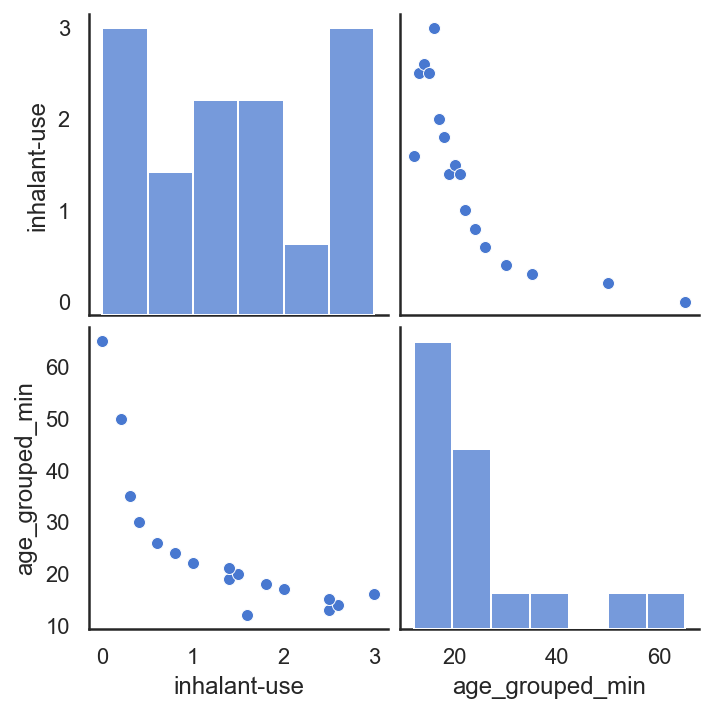

In [196]:
# sns.pairplot(drugdata_with_nans)
sns.pairplot(drugdata_with_nans[['inhalant-use','age_grouped_min']])


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [197]:
# 8.1: Pull out the rate variable from the sat dataset.
sat_scores_df_from_read_csv['Rate'].head(5)

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

In [198]:
# Q 8.2: Are there outliers in the dataset? Define, in words, how you numerically define outliers.
    # Outliers are values which have a variance from the Median which is more than 1.5 x the interqartile range

In [199]:
# 8.3 Print out the outliers in the dataset.

display(
sat_scores['Rate'].describe(), # Run whole .describe() table to see which index to reference
sat_scores['Rate'].describe()[4], # Use index [4] to pull value of Q1
sat_scores['Rate'].describe()[6], # Use index [6] to pull value of Q3
sat_scores['Rate'].describe()[6] - sat_scores['Rate'].describe()[4], # Subtract Q3 from Q1 to find IQR
1.5 * (sat_scores['Rate'].describe()[6] - sat_scores['Rate'].describe()[4]), # Determine 1.5xIQR
sat_scores['Rate'].describe()[5], # Use index [5] to pull value of Q2 (a.k.a.: The Median)
sat_scores['Rate'].median(), # Use the other fomula to make sure
sat_scores['Rate'].describe()[5] + (1.5 * sat_scores['Rate'].describe()[6] - sat_scores['Rate'].describe()[4]), # Determine upper limit for non-outliers
sat_scores['Rate'].describe()[5] - (1.5 * sat_scores['Rate'].describe()[6] - sat_scores['Rate'].describe()[4]), # Determine lower limit for non-outliers
min(sat_scores['Rate'].to_list()), # Find the lowest value
max(sat_scores['Rate'].to_list()) # Find the highest value
    )


#Print a nested summary statement of lack of findings

print("Accoring the 1.5xIQR method, any values lower than {} but greater than {} are outliers. However the range of 'Rate' is from {} to {}. Therefore there are no outliers according to this method."
      .format(
    sat_scores['Rate'].describe()[5] - (1.5 * sat_scores['Rate'].describe()[6] - sat_scores['Rate'].describe()[4]),
    sat_scores['Rate'].describe()[5] + (1.5 * sat_scores['Rate'].describe()[6] - sat_scores['Rate'].describe()[4]),
    min(sat_scores['Rate'].to_list()),
    max(sat_scores['Rate'].to_list())
        )
     )

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

9.0

64.0

55.0

82.5

33.0

33.0

120.0

-54.0

4

82

Accoring the 1.5xIQR method, any values lower than -54.0 but greater than 120.0 are outliers. However the range of 'Rate' is from 4 to 82. Therefore there are no outliers according to this method.


<AxesSubplot:>

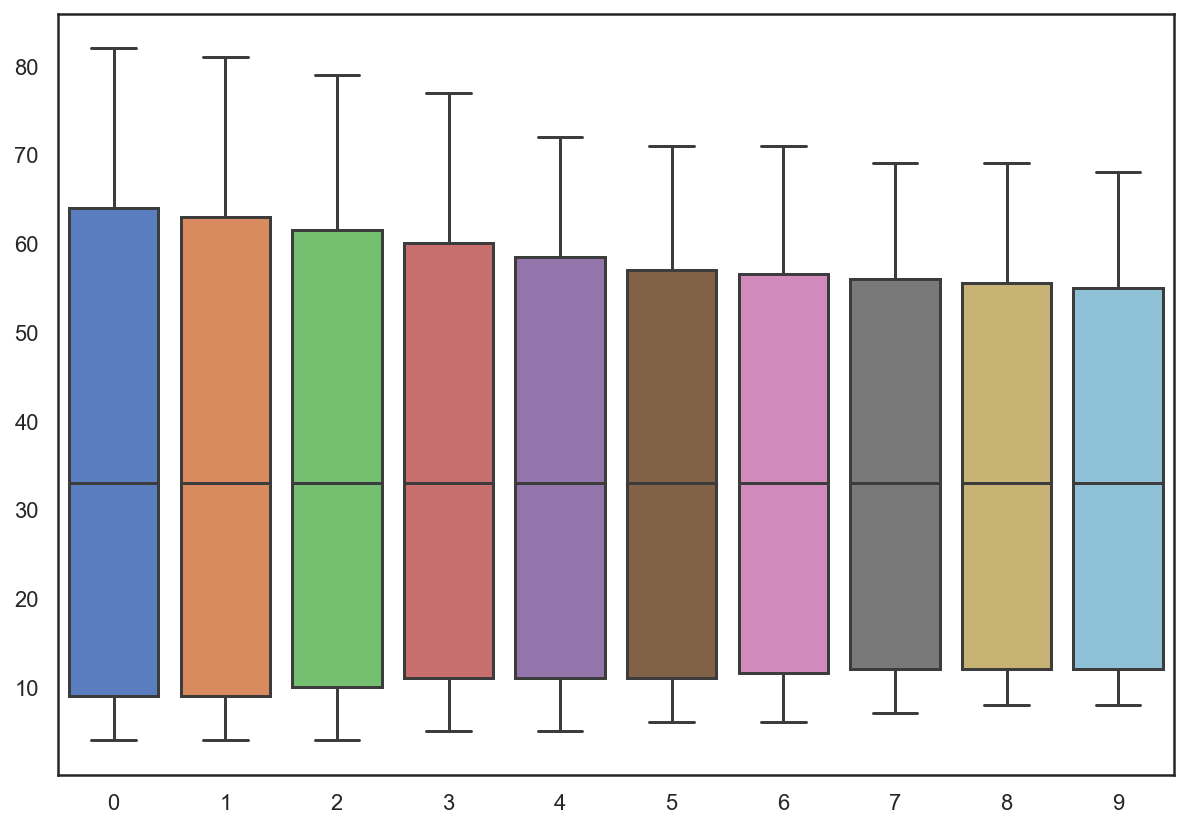

In [200]:
#sat_scores['Rate'].sort_values()[1:-1].to_list()

sns.boxplot(data = [
    sat_scores['Rate'],
    sat_scores['Rate'].sort_values()[1:-1].to_list(),
    sat_scores['Rate'].sort_values()[2:-2].to_list(),
    sat_scores['Rate'].sort_values()[3:-3].to_list(),
    sat_scores['Rate'].sort_values()[4:-4].to_list(),
    sat_scores['Rate'].sort_values()[5:-5].to_list(),
    sat_scores['Rate'].sort_values()[6:-6].to_list(),
    sat_scores['Rate'].sort_values()[7:-7].to_list(),
    sat_scores['Rate'].sort_values()[8:-8].to_list(),
    sat_scores['Rate'].sort_values()[9:-9].to_list()
])

#interact(power_calcplotter, 
#         croped_values=FloatSlider(min=0.5, max=3.0, value=1.0, step=0.1)

In [201]:
# Find the state with the outlier found in sns.pairplot
sat_scores[sat_scores['Math'] == sat_scores['Math'].min()]

,State,Rate,Verbal,Math
27,OH,26,534,439


In [202]:
# Show Data without OH
# sat_scores[sat_scores['Math'] != sat_scores['Math'].min()]

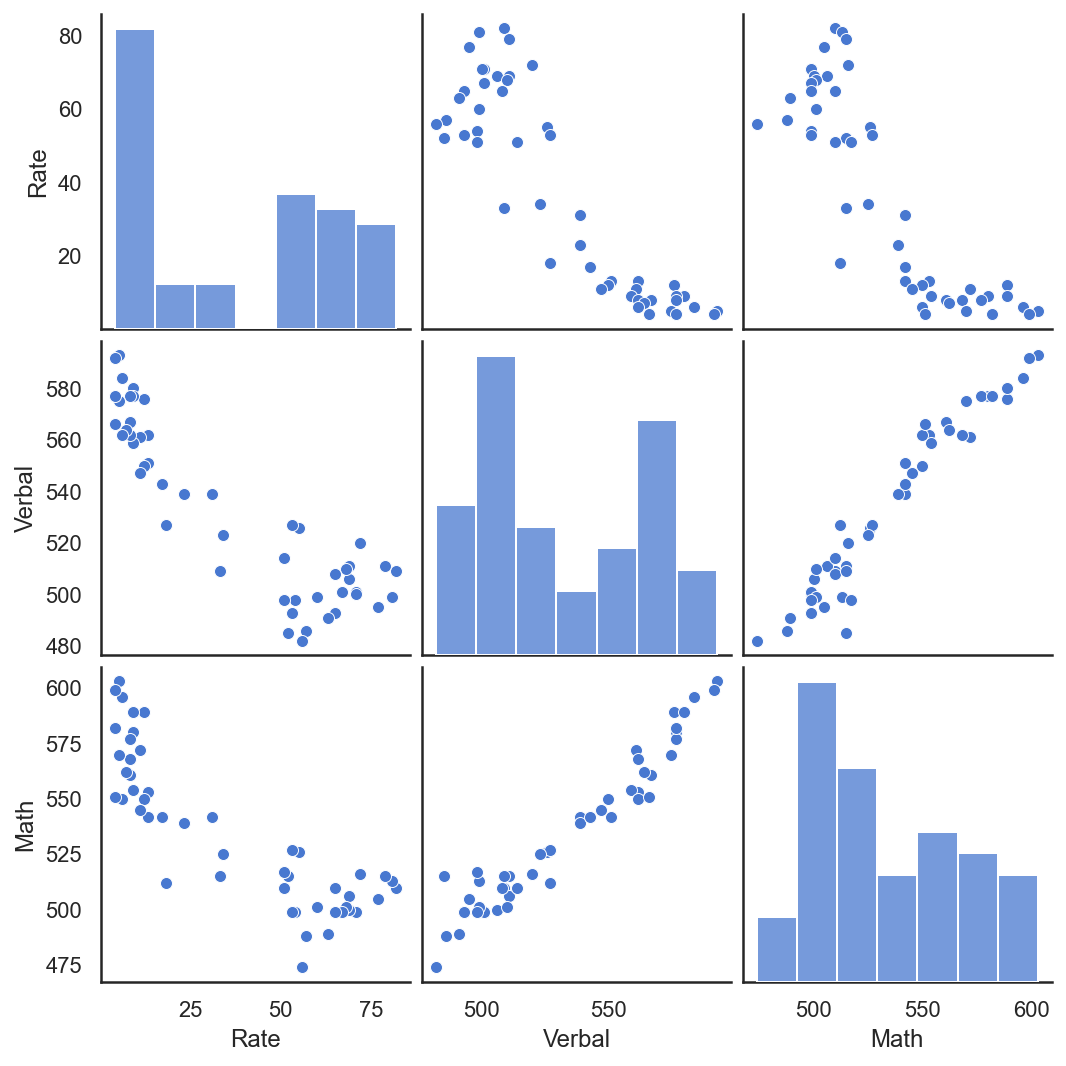

In [203]:
# Show sns.pairplot without OH
sns.pairplot(sat_scores[sat_scores['Math'] != sat_scores['Math'].min()])

<AxesSubplot:>

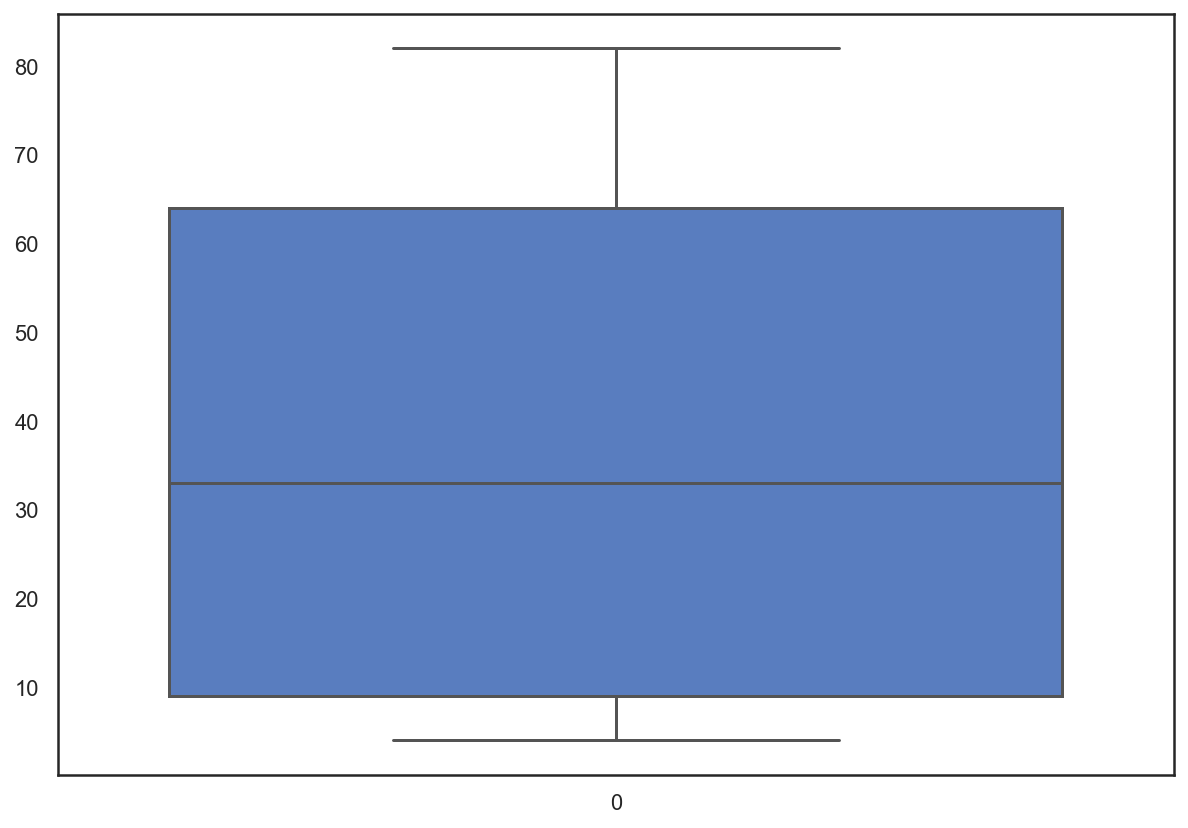

In [204]:
sns.boxplot(data = sat_scores['Rate'])

In [205]:
# Decided to 'learn for the sake of learning' and 'cut off the whiskers', remove any values lower than Q1 and greater than Q3
display(
sat_scores['Rate'].describe()[4], # Use index [4] to pull value of Q1
sat_scores['Rate'].describe()[6] # Use index [6] to pull value of Q3
    )

9.0

64.0

In [206]:
# Appled two masks and created new varaible 'sat_scores_without_whiskers'
sat_scores_without_whiskers = sat_scores[sat_scores['Rate'] > sat_scores['Rate'].describe()[4]][sat_scores['Rate'] < sat_scores['Rate'].describe()[6]]

<ipython-input-206-49ddbc3abfe9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sat_scores_without_whiskers = sat_scores[sat_scores['Rate'] > sat_scores['Rate'].describe()[4]][sat_scores['Rate'] < sat_scores['Rate'].describe()[6]]


<AxesSubplot:>

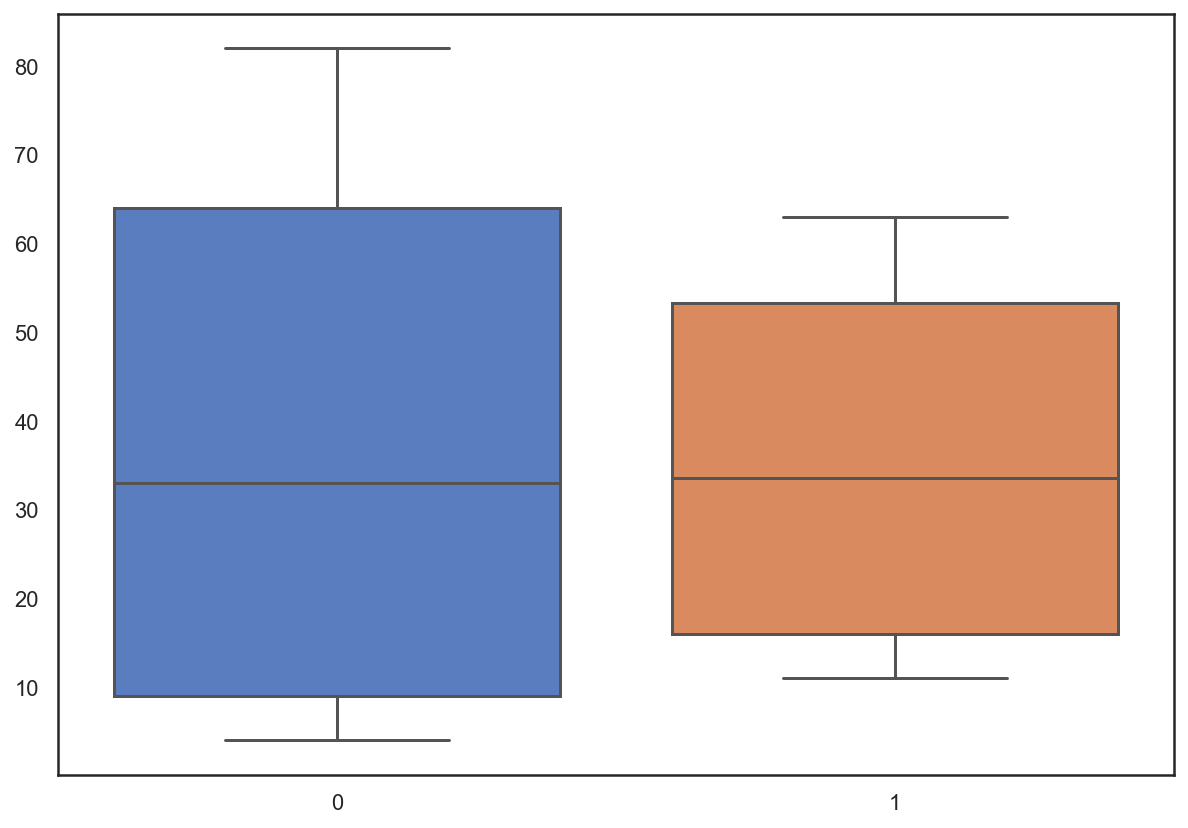

In [207]:
sns.boxplot(data = [
    sat_scores['Rate'],
    sat_scores_without_whiskers['Rate']
])

In [208]:
# Question 8.5 asked to describe these three features: ['mean','std','50%'], all of which are in the built-in .describe() table

display(
sat_scores['Rate'].describe(),
sat_scores_without_whiskers['Rate'].describe()
    )

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

count    24.000000
mean     35.791667
std      19.298523
min      11.000000
25%      16.000000
50%      33.500000
75%      53.250000
max      63.000000
Name: Rate, dtype: float64

In [209]:
# Convert the .describe() table into a DataFrame using pd.DataFrame()
# Reset the index for merging later with .reset_index()
describe_df_sat_scores_unclipped = pd.DataFrame(sat_scores['Rate'].describe()).reset_index()
describe_df_sat_scores_unclipped.columns = ['index', 'Rate Unclipped']
describe_df_sat_scores_without_whiskers = pd.DataFrame(sat_scores_without_whiskers['Rate'].describe()).reset_index()
describe_df_sat_scores_without_whiskers.columns = ['index', 'Rate Without Whiskers']
display(
describe_df_sat_scores_unclipped,
describe_df_sat_scores_without_whiskers
    )

,index,Rate Unclipped
0,count,51.000000
1,mean,37.000000
2,std,27.550681
3,min,4.000000
4,25%,9.000000
5,50%,33.000000
6,75%,64.000000
7,max,82.000000


,index,Rate Without Whiskers
0,count,24.000000
1,mean,35.791667
2,std,19.298523
3,min,11.000000
4,25%,16.000000
5,50%,33.500000
6,75%,53.250000
7,max,63.000000


In [210]:
# Create new column named 'Change after Clipping' to show the offset after cutting the whiskers
# dsi-unit-2.10-pandas-concatenation_joining_data-lesson
# Merge both dataframes bu the index using pd.merge()
describe_df_sat_scores_merged = pd.merge(describe_df_sat_scores_unclipped,describe_df_sat_scores_without_whiskers)
describe_df_sat_scores_merged_offset_included = describe_df_sat_scores_merged.copy()
describe_df_sat_scores_merged_offset_included['Change after Clipping'] = describe_df_sat_scores_merged_offset_included['Rate Without Whiskers'] - describe_df_sat_scores_merged_offset_included['Rate Unclipped']
describe_df_sat_scores_merged_offset_included

,index,Rate Unclipped,Rate Without Whiskers,Change after Clipping
0,count,51.000000,24.000000,-27.000000
1,mean,37.000000,35.791667,-1.208333
2,std,27.550681,19.298523,-8.252158
3,min,4.000000,11.000000,7.000000
4,25%,9.000000,16.000000,7.000000
5,50%,33.000000,33.500000,0.500000
6,75%,64.000000,53.250000,-10.750000
7,max,82.000000,63.000000,-19.000000


In [211]:
# Create mask for the three features in question: ['mean','std','50%'] using .isin([])
describe_df_sat_scores_merged_offset_included['index'].isin(['mean','std','50%'])

0    False
1     True
2     True
3    False
4    False
5     True
6    False
7    False
Name: index, dtype: bool

In [212]:
# Apply mask
describe_df_sat_scores_merged_important3rows = describe_df_sat_scores_merged_offset_included.copy()
describe_df_sat_scores_merged_important3rows = describe_df_sat_scores_merged_offset_included[describe_df_sat_scores_merged_offset_included['index'].isin(['mean','std','50%'])]
describe_df_sat_scores_merged_important3rows[['index','Change after Clipping']]

,index,Change after Clipping
1,mean,-1.208333
2,std,-8.252158
5,50%,0.500000


In [213]:
# Add columns for Krisdan's Answer
# Question 8.5: Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?
describe_df_sat_scores_merged_important3rows_answered = describe_df_sat_scores_merged_important3rows.copy()
describe_df_sat_scores_merged_important3rows_answered['Krisdans Answer for Question 8.5']=[
    "Mean has reduced becuase the top whisker was longer than the bottom whisker, lost more high scores than low scores",
    "A reduction in standard devaition is as expected since we are removing values furthest from the median and furthest from the mean",
    "The median increased because the average z-scores for the bottom whisker would've been greater than the z-scores of the top whisker"
    ]
describe_df_sat_scores_merged_important3rows_answered

,index,Rate Unclipped,Rate Without Whiskers,Change after Clipping,Krisdans Answer for Question 8.5
1,mean,37.000000,35.791667,-1.208333,Mean has reduced becuase the top whisker was l...
2,std,27.550681,19.298523,-8.252158,A reduction in standard devaition is as expect...
5,50%,33.000000,33.500000,0.500000,The median increased because the average z-sco...


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [214]:
# 9.1.0 Calculate the spearman correlation of sat Verbal and Math
display(
stats.spearmanr(sat_scores_noall[['Verbal','Math']])[0],
print("Answer 9.1.0: The spearman correlation of sat Verbal and Math is {}".format(stats.spearmanr(sat_scores_noall[['Verbal','Math']])[0]))
)

Answer 9.1.0: The spearman correlation of sat Verbal and Math is 0.9094125143903472


0.9094125143903472

None

In [215]:
# Create two new columns for the Ranks of both Verbal and Math where No.1 is the highest, use: .rank(ascending = False)
sat_scores_with_rank = sat_scores.copy()
sat_scores_with_rank['Rank of Rate'] = sat_scores_with_rank['Rate'].rank(ascending = False)
sat_scores_with_rank['Rank of Verbal'] = sat_scores_with_rank['Verbal'].rank(ascending = False)
sat_scores_with_rank['Rank of Math'] = sat_scores_with_rank['Math'].rank(ascending = False)
sat_scores_with_rank

,State,Rate,Verbal,Math,Rank of Rate,Rank of Verbal,Rank of Math
0,CT,82,509,510,1.0,34.5,35.0
1,NJ,81,499,513,2.0,41.5,32.0
2,MA,79,511,515,3.0,31.5,30.0
3,NY,77,495,505,4.0,45.0,38.0
4,NH,72,520,516,5.0,29.0,28.0
5,RI,71,501,499,6.5,38.5,44.5
6,PA,71,500,499,6.5,40.0,44.5
7,VT,69,511,506,8.5,31.5,37.0
8,ME,69,506,500,8.5,37.0,41.0
9,VA,68,510,501,10.0,33.0,39.5


In [216]:
sat_scores_with_rank[['Rank of Verbal','Rank of Math']].corr()

,Rank of Verbal,Rank of Math
Rank of Verbal,1.000000,0.909413
Rank of Math,0.909413,1.000000


In [217]:
# 9.1.1 How does the spearman correlation compare to the pearson correlation?
# 9.1.2 Describe clearly in words the process of calculating the spearman rank correlation

    # Krisdan's Answer to both questions:
        # Pearson correlation desribes the strength of the linear correlation between two variables
        # Spearman correlation has an extra step where each value is converted to their rank in reaspect to 
        # rest of the values in the same variable. These ranks, not values, are then subjected to the 
        # same calculation as Pearson correlation to find the Spearman correlation


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html \
https://numpy.org/doc/stable/reference/generated/numpy.percentile.html (Updated by Krisdan)

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html (Updated by Krisdan)

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [218]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

In [219]:
# 9.2.1 Convert Rate to percentiles in the sat scores as a new column.

sat_scores_with_percentile_from_Rate = sat_scores.loc[:50] # Removed the Row 'All States'
sat_scores_with_percentile_from_Rate['Percentile from np.percentile'] = np.percentile( # Give name for new column and use np.percentile
                                                    sat_scores_with_percentile_from_Rate['Rate'].to_list(), # Convert entire Rate-column into a list
                                                    sat_scores_with_percentile_from_Rate['Rate'],  # Specify the percentile to compare
                                                    )
sat_scores_with_percentile_from_Rate['Percentile from stats.percentileofscore'] = sat_scores_with_percentile_from_Rate['Rate'].apply(lambda x: stats.percentileofscore(sat_scores_with_percentile_from_Rate['Rate'],x))
sat_scores_with_percentile_from_Rate # Show entire table with new column
#stats.percentileofscore

<ipython-input-219-afc3f28f6d04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_scores_with_percentile_from_Rate['Percentile from np.percentile'] = np.percentile( # Give name for new column and use np.percentile
<ipython-input-219-afc3f28f6d04>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_scores_with_percentile_from_Rate['Percentile from stats.percentileofscore'] = sat_scores_with_percentile_from_Rate['Rate'].apply(lambda x: stats.percentileofscore(sat_scores_with_percentile_from_Rate['Rate'],

,State,Rate,Verbal,Math,Percentile from np.percentile,Percentile from stats.percentileofscore
0,CT,82,509,510,68.0,100.000000
1,NJ,81,499,513,67.5,98.039216
2,MA,79,511,515,66.0,96.078431
3,NY,77,495,505,65.0,94.117647
4,NH,72,520,516,60.0,92.156863
5,RI,71,501,499,58.5,89.215686
6,PA,71,500,499,58.5,89.215686
7,VT,69,511,506,56.5,85.294118
8,ME,69,506,500,56.5,85.294118
9,VA,68,510,501,56.0,82.352941


In [220]:
# 9.2.2 Show the percentile of California in Rate.

# Create mask for just CA
sat_scores_with_percentile_from_Rate['State'] == 'CA'
# Apply mask to show whole row for just CA
sat_scores_with_percentile_from_Rate[sat_scores_with_percentile_from_Rate['State'] == 'CA']


,State,Rate,Verbal,Math,Percentile from np.percentile,Percentile from stats.percentileofscore
23,CA,51,498,517,33.5,55.882353


In [221]:
# 9.2.2 Show the percentile of California in Rate.
# Specify thew column by tacking ['Percentile from Rate'] on the end
# Convert to a float
# Nest the float into a printed layman statement.
print("The Percentile of the Rate of CA is {}".format(float(sat_scores_with_percentile_from_Rate[sat_scores_with_percentile_from_Rate['State'] == 'CA']['Percentile from stats.percentileofscore'])))

The Percentile of the Rate of CA is 55.88235294117647


In [222]:
# 9.2.3 How is percentile related to the spearman rank correlation?
    # Both use rank to calculate how many of the whole series are lower than the value being scored

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [223]:
# 9.3.1 Why might percentile scoring be useful for dealing with outliers?
    # A method of find outliers is defened by any value with a difference from the medien which is 1.25 times the different between the 75% percentile value and the 25% percentile value.

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


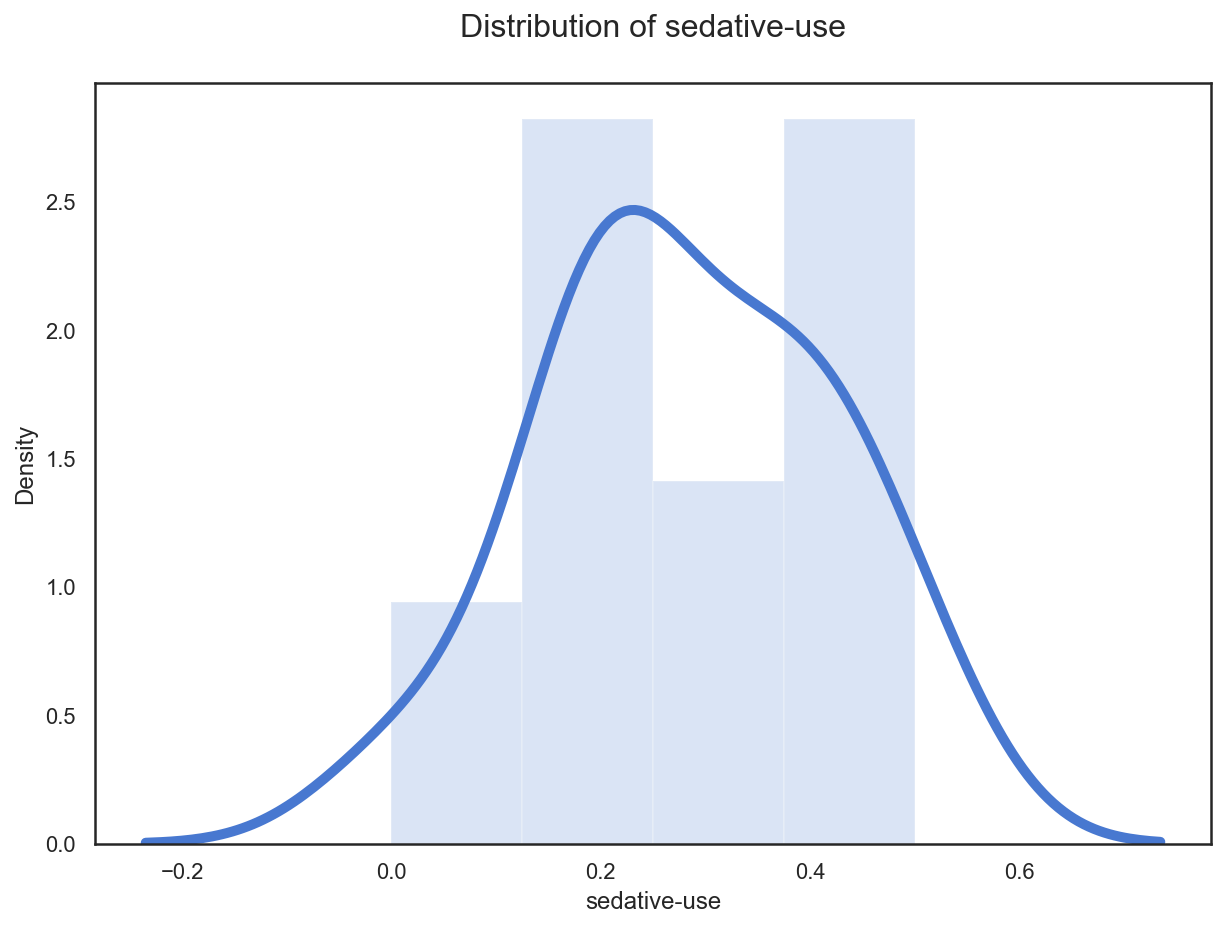

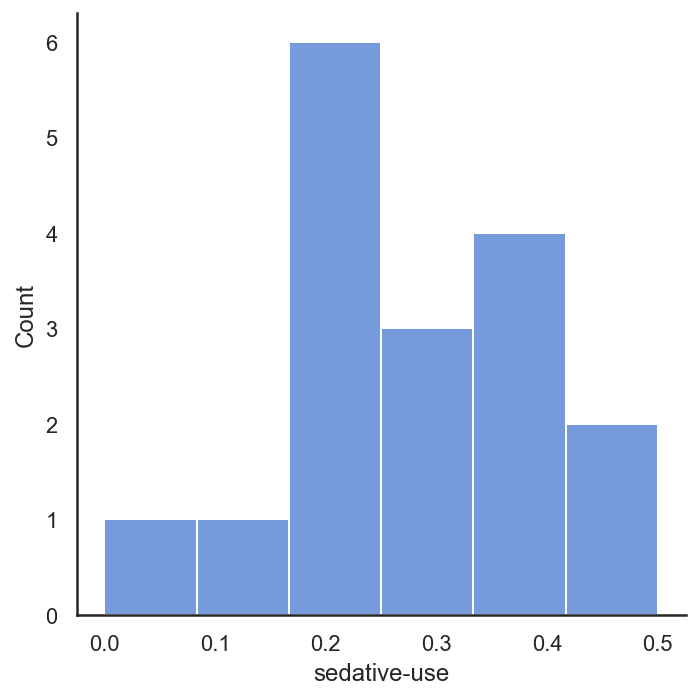

In [224]:
# 9.3.2 Plot the distribution of a variable of your choice from the drug use dataset.
# I chose the series with the lowest standard deviation
distribution_plotter('sedative-use',drugdata)
sns.displot(drugdata['sedative-use'])

In [225]:
# 9.3.3 Plot the same variable but percentile scored.
    #
sedative_use = drugdata[['sedative-use']]
sedative_use['stats.percentileofscore'] = drugdata['sedative-use'].apply(lambda x: stats.percentileofscore(drugdata['sedative-use'], x))
sedative_use
# Use stats.percentileofscore() nested in a lambda funtion

<ipython-input-225-2773dd8766ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sedative_use['stats.percentileofscore'] = drugdata['sedative-use'].apply(lambda x: stats.percentileofscore(drugdata['sedative-use'], x))


,sedative-use,stats.percentileofscore
0,0.2,32.352941
1,0.1,11.764706
2,0.2,32.352941
3,0.4,79.411765
4,0.2,32.352941
5,0.5,97.058824
6,0.4,79.411765
7,0.3,58.823529
8,0.5,97.058824
9,0.3,58.823529


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


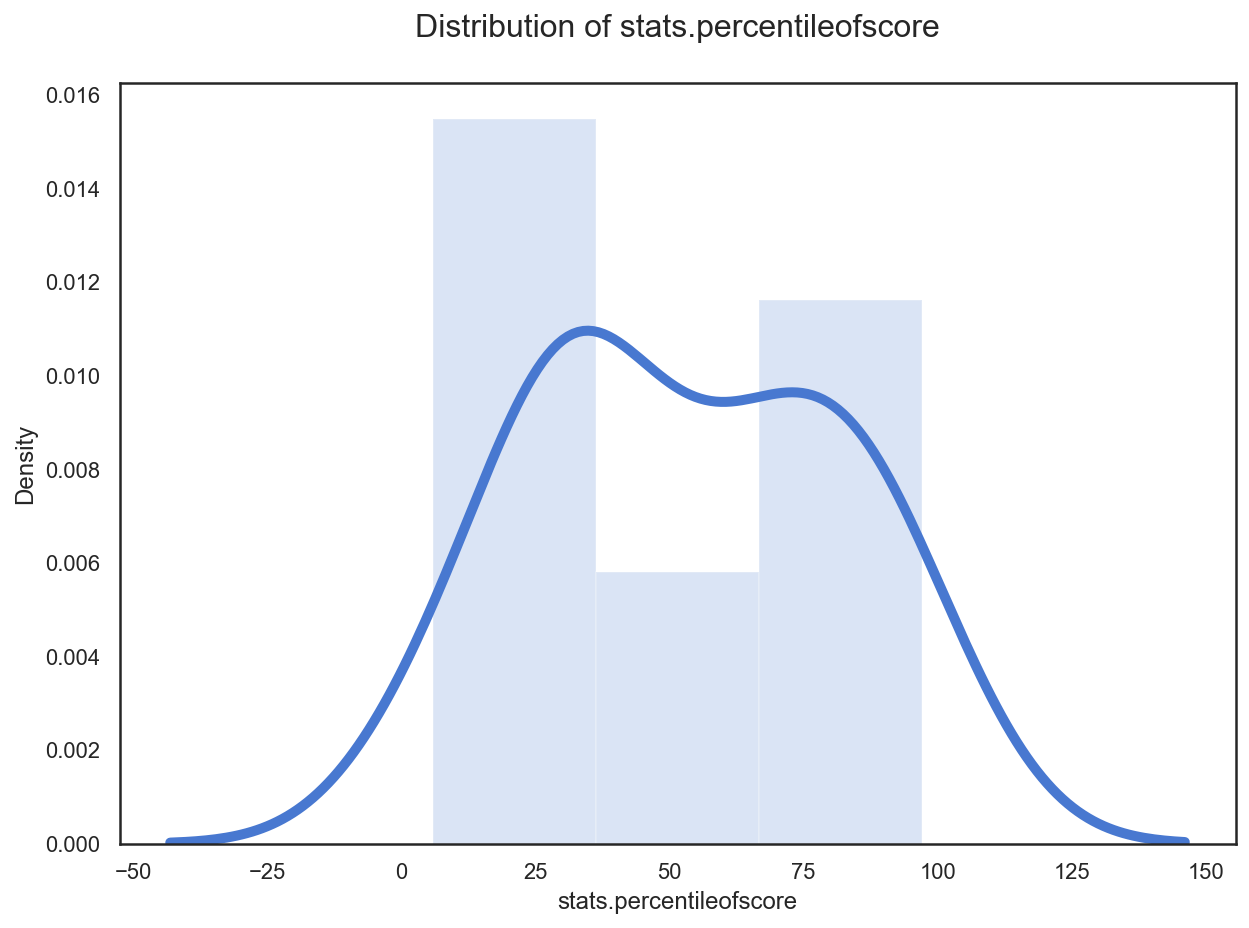

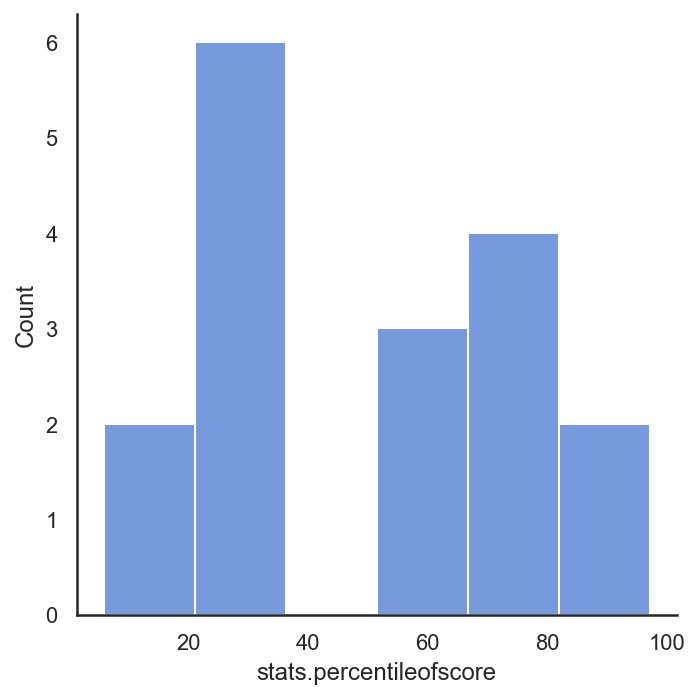

In [226]:
distribution_plotter('stats.percentileofscore',sedative_use)
sns.displot(sedative_use['stats.percentileofscore'])

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


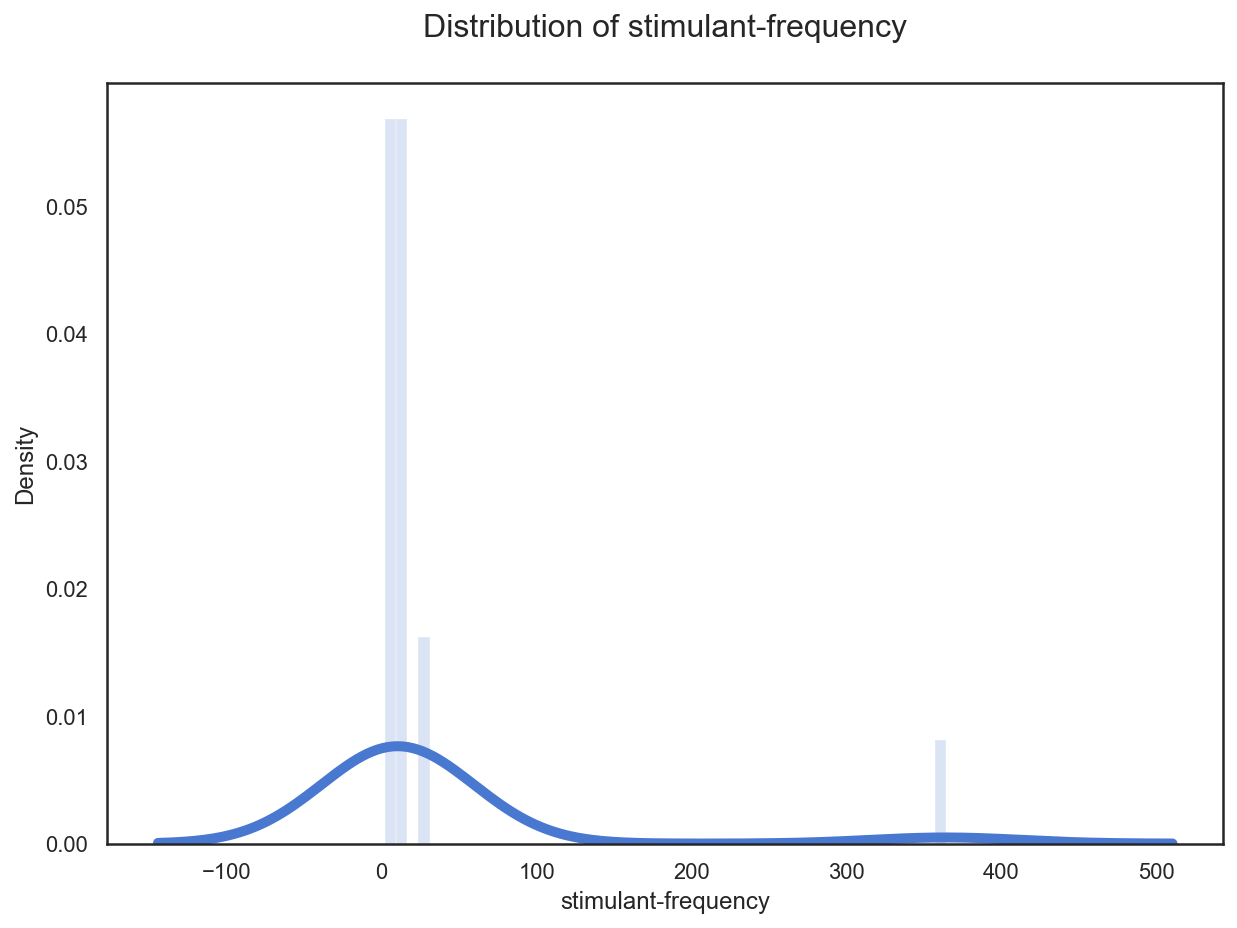

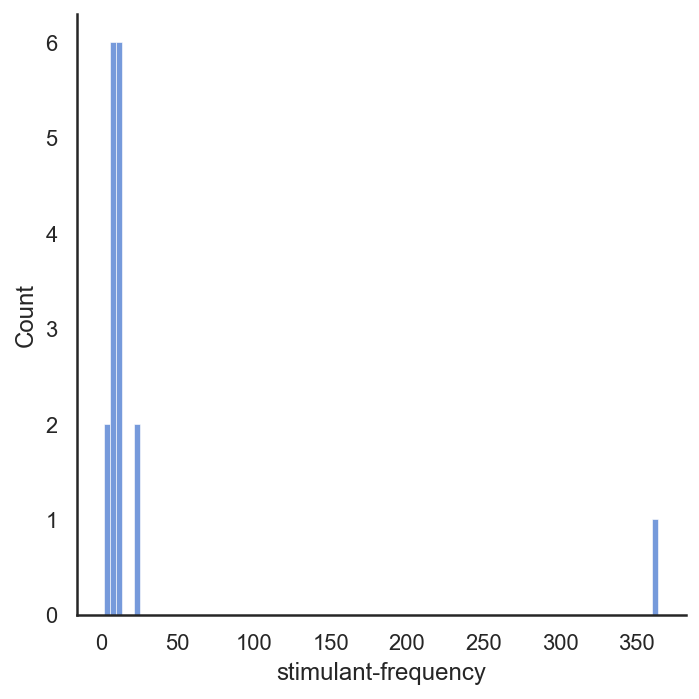

In [227]:
# Try again with series with the highest standard deviation
distribution_plotter('stimulant-frequency',drugdata)
sns.displot(drugdata['stimulant-frequency'])

In [228]:
stimulant_frequency = drugdata[['stimulant-frequency']]
stimulant_frequency['stats.percentileofscore'] = stimulant_frequency['stimulant-frequency'].apply(lambda x: stats.percentileofscore(stimulant_frequency['stimulant-frequency'],x))
stimulant_frequency

<ipython-input-228-633b946ec249>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimulant_frequency['stats.percentileofscore'] = stimulant_frequency['stimulant-frequency'].apply(lambda x: stats.percentileofscore(stimulant_frequency['stimulant-frequency'],x))


,stimulant-frequency,stats.percentileofscore
0,2.0,5.882353
1,4.0,11.764706
2,12.0,76.470588
3,6.0,20.588235
4,9.5,47.058824
5,9.0,41.176471
6,8.0,35.294118
7,6.0,20.588235
8,12.0,76.470588
9,10.0,58.823529


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


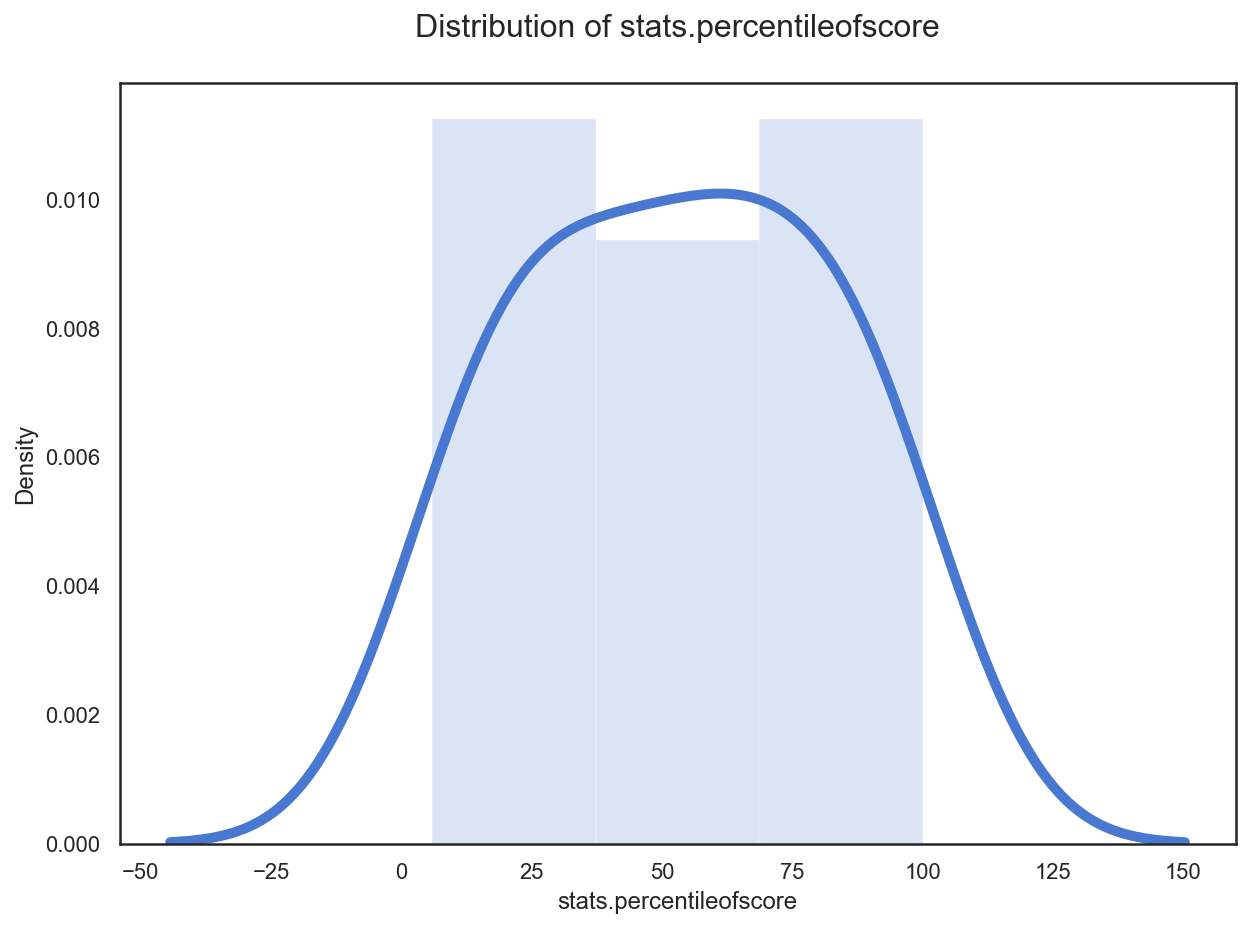

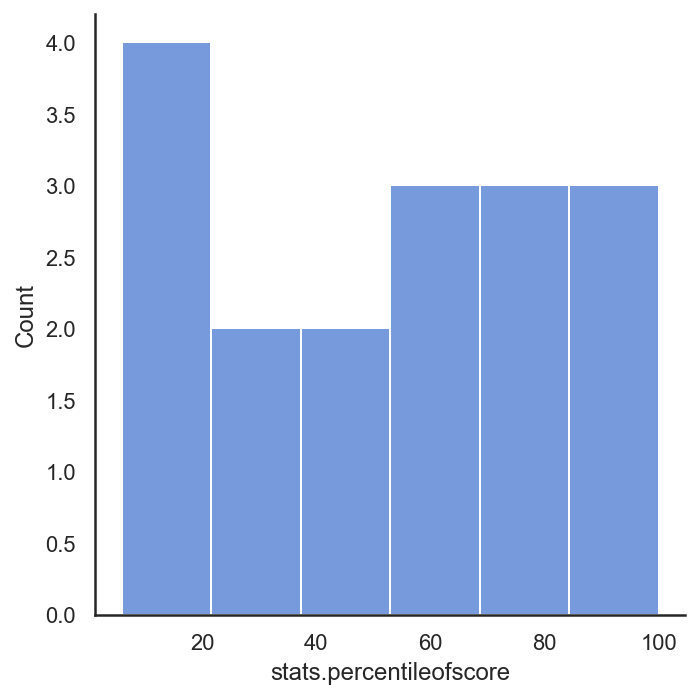

In [229]:
distribution_plotter('stats.percentileofscore',stimulant_frequency)
sns.displot(stimulant_frequency['stats.percentileofscore'])

In [230]:
# 9.3.4 Describe the effect, visually, of coverting raw scores to percentile.
    # It seems the accentuate the peaks and spread out the curve more
    # Like 'zooming in' to the curve